
# Final Project of Introduction to Bioinformatics

## The Song Bird Study

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/amirezzati/bioinformatics-project/feature/the-songbird-study/the-songbird-study/SocialNetworking.png?token=GHSAT0AAAAAACIZ25C6H333KMET2HQ7JV7WZOEZHEA" width="350">
</div>

### Introduction

#### Investigating the Influence of Social Environment on Neural Responses to Sickness in Zebra Finches: A Bioinformatics Approach

The Zebra Finch, _Taeniopygia guttata_, a widely used model organism in behavioral and neurobiological research, provides an excellent platform to study the interplay between social environment, neural function, and immune response. In this project, we delve into an intriguing scientific question: How does the social environment of these birds modulate their neural response to immune challenges?

This question was explored in a study by Lopes PC, Faber-Hammond JJ, Siemonsma C, Patel S, and Renn SCP, titled _"The social environment alters neural responses to a lipopolysaccharide challenge"_ (Brain Behav Immun 2023). Their research demonstrated that the social environment, particularly the presence of conspecifics, could significantly modulate the neural responses of Zebra Finches to immune challenges such as lipopolysaccharide (LPS), a molecule known to induce immune responses. Link to Paper

Our goal in this notebook is to revisit and build upon the findings of this study. Using RNA sequencing data from their research, we aim to conduct a comprehensive analysis of changes in gene expression across different brain regions of Zebra Finches under different social conditions. We will specifically focus on the hypothalamus, the bed nucleus of the stria terminalis, and the nucleus taeniae, all of which are key regions for understanding behavior and immune response.

The essence of this project is to draw meaningful insights from high-dimensional data. We encourage you to start with basic approaches and gradually build complexity. Remember, every effort to extract information and gain insights from the data is valuable and will be recognized. Approach the tasks with curiosity and an open mind, and let your analytical journey be both informative and enjoyable.

---

### Experiment Design

The primary aim of this high-throughput sequencing study was to discern how different social environments could modulate the neural response to sickness induced by lipopolysaccharide (LPS).

**Lipopolysaccharide (LPS)** is a large molecule consisting of a lipid and a polysaccharide, found in the outer membrane of Gram-negative bacteria. It is often referred to as an endotoxin due to its ability to trigger strong immune responses. When a Gram-negative bacterium dies, it releases its LPS, which can then find its way into the bloodstream. In the context of this study, LPS was used to simulate an immune challenge or sickness in the Zebra Finches.

**The Experimental Setup:**

The experiment involved male Zebra Finches, which were administered either an LPS injection to simulate sickness or a control solution. Following the injection, the birds were placed in one of four distinct social contexts:

- **Isolated (ISO)**: In this setting, the birds were kept alone without a female. This condition was designed to examine the neural and immune responses of the birds in the absence of any social interactions. This group helps to understand the baseline responses to the LPS challenge when there are no social factors at play.
- **Known Female Continuous (KFC)**: Here, the birds were continuously housed with a known female. This condition allowed the researchers to investigate the effects of a stable social environment on the birds' responses to the LPS challenge. This group can provide insights into how ongoing social interactions might influence the response to sickness.
- **Known Female Reunited (KF)**: In this scenario, the birds were reunited with a known female after a period of separation. This condition was intended to mimic the effects of a disrupted social environment followed by a reunion. This group can shed light on how changes in social relationships might affect the neural and immune responses to sickness.
- **Novel Female (NF)**: In this context, the birds were paired with a previously unknown female. This condition was designed to explore the effects of introducing a new social partner on the birds' responses to the LPS challenge. This group can reveal how novel social encounters might modulate the response to sickness.

These social settings were carefully chosen to represent a range of social interactions that the birds might encounter in their natural habitats. The experimental design allows for a comprehensive investigation of how social environment influences the neural responses to sickness, thereby improving our understanding of how the social environment can affect health.

---

### Understanding RNA-Seq

RNA-Seq (RNA sequencing) is a powerful technique that uses next-generation sequencing (NGS) to reveal the presence and quantity of RNA molecules in a biological sample. It provides a snapshot of gene expression, also known as the transcriptome.

**What is RNA-Seq?**

RNA-Seq allows us to investigate and discover the transcriptome, which is the total cellular content of RNAs including mRNA, rRNA, and tRNA. Understanding the transcriptome is key if we are to connect the information in our genome with its functional protein expression. RNA-Seq can tell us which genes are turned on in a cell, what their level of transcription is, and at what times they are activated or shut off. This allows scientists to understand the biology of a cell more deeply and assess changes that may indicate disease.

**How does RNA-Seq work?**

The RNA-Seq workflow has several steps:

1. **RNA extraction**: The first step involves extracting the total RNA from the sample.
2. **Reverse transcription into cDNA**: The extracted RNA is then converted into complementary DNA (cDNA) through a process called reverse transcription.
3. **Library preparation**: The cDNA is then used to prepare a sequencing library. This involves fragmenting the cDNA, adding sequencing adapters, and amplifying the library.
4. **Sequencing**: The prepared library is then sequenced using high-throughput sequencing technology.

**RNA-Seq Data**

The output of an RNA-Seq experiment is a large set of short DNA sequences, or reads. These reads can be aligned to a reference genome to determine which genes were being transcribed at the time the sample was collected. The number of reads aligning to a particular gene provides a measure of that gene's expression level.

**RNA-Seq vs Microarrays**

RNA-Seq has several advantages over microarray technology, a legacy technology often used in gene expression studies. Unlike microarrays, which require species- or transcript-specific probes, RNA-Seq does not require any prior knowledge about the sequences of the transcripts. This allows RNA-Seq to detect novel transcripts, gene fusions, single nucleotide variants, indels (small insertions and deletions), and other previously unknown changes. RNA-Seq also has a wider dynamic range and higher sensitivity compared to microarrays, making it better at detecting transcripts and specifically isoforms.

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer these questions!</strong>
</blockquote>

**Questions**

1. Why is it important to convert RNA into cDNA for RNA-Seq? What would happen if we tried to sequence RNA directly?
2. How does the process of preparing a sequencing library contribute to the accuracy of RNA-Seq results? What are some potential sources of error in this step?
3. How does the ability of RNA-Seq to detect novel transcripts contribute to our understanding of gene function? Can you think of a scenario where this capability would be particularly useful?
4. Why might a researcher choose to use RNA-Seq instead of microarrays for a gene expression study? What are some potential advantages and disadvantages of each method?


**_Your Answer:_**:

---
1. Because RNA isn't as stable as DNA and can easily break down, especially when exposed to RNases (enzymes that break down RNA), it's tricky to keep RNA samples free from these enzymes. Turning RNA into cDNA solves this problem by making the sample more stable and preserving its information.
2. Improper library preparation can lead to biases and errors in the sequencing data.              
- RNA quality: RNA degradation can lead to inaccurate results. RNA samples should be of high quality and free of contaminants.         
- Library size selection: The size of the library fragments can affect the accuracy of the sequencing data. If the fragments are too small or too large, it can lead to inaccurate results.            
- PCR amplification: PCR amplification is used to amplify the library fragments before sequencing. Over-amplification or under-amplification can lead to inaccurate results.          
- Adaptor ligation: Adaptor ligation is the process of attaching adapters to the library fragments. Incomplete or incorrect adaptor ligation can lead to inaccurate results.
3. RNA-Seq gives us a broader understanding of the transcriptome, helping us find new genes, different ways genes are spliced, and non-coding RNAs that could be significant in biological processes.       
For instance, RNA sequencing (RNA-Seq) has helped uncover new transcripts unique to cancer cells, absent in healthy ones. In this way we find out the specific gene's function. These discoveries may lead to novel avenues for cancer treatment or offer valuable clues about how cancer develops at the molecular level.       
4. RNA-Seq presents several advantages over microarrays:

    **Expanded Dynamic Range:** RNA-Seq detects gene expression across a wider dynamic range compared to microarrays, which are limited by background at lower levels and signal saturation at higher levels.

    **Higher Sensitivity:** RNA-Seq detects a higher percentage of differentially expressed genes, particularly those with low expression levels, compared to microarrays.

    **Identification of Novel Transcripts:** RNA-Seq can identify novel transcripts, gene fusions, single nucleotide variants, indels, and other previously unknown changes that microarrays cannot detect.

    **Detection of Rare and Low-Abundance Transcripts:** RNA-Seq easily detects rare transcripts, single transcripts per cell, or weakly expressed genes by increasing sequencing coverage depth.

    However, RNA-Seq also has some disadvantages compared to microarrays. It is more expensive and computationally intensive, and requires more starting material. Additionally, RNA-Seq is more sensitive to RNA degradation.

### Step 0: Installing Necessary Packages

In [1]:
import sys
import subprocess
import pkg_resources
import pandas as pd

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

REQUIRED_PACKAGES = [
    'biopython',
    'pandas',
    'numpy',
    'matplotlib',
    'seaborn',
    'xlrd',
    'mygene'
]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) is installed'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} is NOT installed'.format(package))
        install(package)
        print('{} was successfully installed.'.format(package))

biopython is NOT installed
biopython was successfully installed.
pandas (1.5.3) is installed
numpy (1.23.5) is installed
matplotlib (3.7.1) is installed
seaborn (0.13.1) is installed
xlrd (2.0.1) is installed
mygene is NOT installed
mygene was successfully installed.


In [48]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the Dataset: A First Glimpse into the Zebra Finch's World

With our tools at the ready, let's embark on the initial phase of our exploration. We'll load the dataset containing the read counts from the Zebra Finch RNA-Seq study and begin to unravel the secrets it holds.

In [4]:
# Loading the RNA-Seq read count data
drive_path = '/content/drive/MyDrive/Bioinf'
dataset_path = drive_path + '/dataset/GSE203528_readcount.xls'
df_read_counts = pd.read_csv(dataset_path, sep='\t')


display(df_read_counts.head())
df_read_counts.to_csv(drive_path + '/dataset/GSE203528_readcount.csv', index=False, sep='\t')


,geneID,HY3,HY4,HY5,HY6,HY8,HY9,HY12,HY13,HY14,...,TN62,TN63,TN64,TN65,TN66,TN67,TN68,TN69,TN70,TN71
0,ENSTGUG00000008284,145,113,149,121,159,172,133,153,192,...,114,111,185,144,134,158,105,143,116,161
1,ENSTGUG00000003938,25,18,21,29,22,38,23,34,35,...,27,52,63,92,31,52,44,53,33,40
2,ENSTGUG00000011987,915,681,938,638,900,749,736,717,657,...,710,1360,1277,1291,554,1225,956,1166,571,936
3,ENSTGUG00000017592,5,5,5,14,5,4,22,13,11,...,3,1,2,5,5,3,11,5,13,2
4,ENSTGUG00000009442,226,211,221,257,202,197,231,201,263,...,271,273,423,226,242,216,365,414,313,316


#### Exploring the Zebra Finch RNA-Seq Data

In this RNA-Seq dataset, we delve into the complex world of the Zebra Finch by examining gene expression in three distinct areas of the brain: the hypothalamus, the bed nucleus of the stria terminalis, and the nucleus taeniae. Each of these regions plays a unique role in bird behavior and physiology.

- **The Hypothalamus** (HY samples): This region is crucial for controlling hormones and basic survival functions like feeding, fighting, fleeing, and reproduction.
- **The Bed Nucleus of the Stria Terminalis** (NST samples): This area is involved in the bird's stress response and emotional behavior.
- **The Nucleus Taeniae** (TN samples): An area of the brain unique to birds, thought to be involved in social behaviors and possibly song learning.

These regions were likely chosen for their significant roles in behaviors that are crucial for survival and species-specific activities. By analyzing gene expression in these areas, researchers can gain insights into how these regions contribute to the unique behaviors of the Zebra Finch.

**Dataset Breakdown**

Each row in the dataset represents a different gene, identified by a geneID like `ENSTGUG00000008284`. The columns, labeled with codes like `HY3`, `HY4`, `NST3`, etc., correspond to samples from these three brain regions. The numbers are read counts, indicating how often each gene's RNA was detected in the sample. High numbers suggest a gene is very active in that sample.

These numbers are crucial. They tell us how active each gene was in each sample. The higher the number, the more active the gene. By comparing these numbers across different samples, we can get insights into how gene activity varies in different situations or conditions.

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer these questions!</strong>
</blockquote>

**Questions**

1. Why do you think the read counts vary between different genes in the same sample? What biological factors might contribute to this variation?
2. Can you think of any reasons why the read counts for the same gene might vary between different samples? Consider the experimental design and the nature of biological systems.
3. How would you interpret a situation where a gene has a high read count in one sample and a low read count in another? What might this tell us about the gene's role in the Zebra Finch's response to its social environment and the LPS challenge?

**Answers**     
1. Several biological factors play a role in this phenomenon. Gene dispersion is a significant factor, alongside others such as differences in gene expression levels, alternative splicing, post-transcriptional modifications, variances in gene length, and GC content.      
2. The experimental design can influence read counts through biases introduced during sample preparation, sequencing, and data analysis. Factors such as the choice of sequencing platform, library preparation protocol, and sequencing depth can affect read counts. Additionally, biological variability between samples can also impact read counts. For example, gene expression levels may vary due to factors such as age, sex, tissue type, and disease status.      
3. One possible explanation for the difference in read counts could be differential gene expression. If the read counts of a gene vary across different social events, it suggests that the expression of that particular gene is influenced by the specific social environment. Therefore, if the LSP treatment group exhibits different read counts compared to the control group, it could affect gene expression in social events and potentially demonstrate a positive performance.        


**Before proceeding, it's essential to ensure you have a foundational understanding of RNA-Seq, the objectives and design of the experiment we're examining, and the significance of each cell in the dataset. Grasping these concepts is crucial for successfully navigating the tasks ahead.**

---

## Preprocessing and Normalization

In this section, we begin our data analysis by focusing on preprocessing and normalization. Preprocessing involves converting the raw Ensembl gene IDs into more recognizable gene symbols, enhancing the interpretability of our data. Following this, normalization is performed to adjust for variations in sequencing depth and gene length, a crucial step to ensure accurate comparison of gene expression across different samples.

### Transforming and Merging the Dataset for Analysis

To facilitate our analysis, we need to restructure the gene expression data so that each row corresponds to a sample, with appropriate labels for social settings and tissue types. This transformation will enable us to apply machine learning techniques and conduct more effective analyses.

The process involves two main steps:
1. **Transpose the Gene Expression Data**: Convert the gene expression data so that each row represents a sample and each column corresponds to a gene.
2. **Merge with Sample Mapping**: Combine the transposed gene expression data with the `sample_mapping.csv` to add social setting, study group, and tissue type information to each sample.

This approach will create a dataset better suited for exploratory data analysis, clustering, and other statistical methods.


In [5]:
import pandas as pd

# Load the gene expression data
expression_data = pd.read_csv(drive_path+'/dataset/GSE203528_readcount.xls', sep='\t')

# Transpose the dataframe so that columns become rows and vice versa
transposed_df = expression_data.set_index('geneID').T.reset_index()
transposed_df.rename(columns={'index': 'tissue_id'}, inplace=True)

# Load the sample mapping data
sample_mapping = pd.read_csv(drive_path+'/dataset/sample_mappings.csv')

# Merge the transposed gene expression data with the sample mapping
merged_df = pd.merge(transposed_df, sample_mapping, on='tissue_id')

# Reorder columns to place metadata columns at the front
metadata_columns = ['sample_id', 'social_settting', 'study_group', 'tissue_id']
gene_columns = [col for col in merged_df.columns if col not in metadata_columns]
transformed_df = merged_df[metadata_columns + gene_columns]

# Save the transformed and merged dataset
transformed_df.to_csv(drive_path+'/dataset/transformed_dataset.csv', index=False)

# Display the first few rows of the transformed dataset
display(transformed_df.head())

,sample_id,social_settting,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,GSM6175777,NF,L,HY3,145,25,915,5,226,94,...,443,493,722,0,0,0,1473,43,276,181
1,GSM6175779,ISO,S,HY5,149,21,938,5,221,76,...,327,433,523,0,0,0,1522,37,145,118
2,GSM6175780,ISO,L,HY6,121,29,638,14,257,126,...,350,370,395,0,2,1,1320,22,174,110
3,GSM6175781,ISO,L,HY8,159,22,900,5,202,178,...,418,435,389,0,26,5,1542,57,219,116
4,GSM6175782,ISO,L,HY9,172,38,749,4,197,94,...,274,342,291,0,0,5,1267,24,157,88


### Converting Ensembl IDs to Gene Names (Bonus)

In our dataset, genes are currently identified by Ensembl IDs. While these IDs are precise, they may not be as immediately recognizable as standard gene names. For those interested in working with more familiar gene names, there's a straightforward way to annotate these IDs.

**Steps to Annotate Gene IDs:**
1. **Use MyGeneInfo Library**: MyGeneInfo is a powerful tool for gene annotation. It allows you to query a database with Ensembl IDs and retrieve corresponding standard gene names.
2. **Query for Zebra Finch Genes**: Given that our study is on Zebra Finch, it's important to use the correct NCBI taxonomy ID (59729) for this species when querying.
3. **Merge Results with Original Data**: After obtaining the gene names, you can merge this information back into your dataset, linking each Ensembl ID to its standard gene name.

**Python Implementation**:
If you wish to perform this annotation, you can use the Python library `mygene`. Initialize a `MyGeneInfo` object, query using your list of Ensembl IDs, and then merge the results with your dataset. This process adds a column for gene names, enhancing the readability and interpretability of your data.

Remember, while this annotation adds clarity, the original Ensembl IDs are crucial for maintaining the accuracy and precision of genomic data.


In [ ]:
pip install mygene -q

In [ ]:
import mygene
mg = mygene.MyGeneInfo()

In [ ]:
selected_gene = 'ENSTGUG00000010166'
mg.getgene(selected_gene, species='59729') # 'taxid': 59729

[{'_id': '115491411',
  '_version': 1,
  'accession': {'genomic': ['NC_044242.2', 'RRCB02000033.1'],
   'protein': 'XP_030115313.1',
   'rna': ['GGLD01075817.1', 'GGLD01107799.1', 'XM_030259453.3'],
   'translation': {'protein': 'XP_030115313.1', 'rna': 'XM_030259453.3'}},
  'alias': 'TUBA1A',
  'ensembl': {'gene': 'ENSTGUG00000010166',
   'protein': ['ENSTGUP00000010495',
    'ENSTGUP00000025406',
    'ENSTGUP00000028034',
    'ENSTGUP00000031966',
    'ENSTGUP00000032907'],
   'transcript': ['ENSTGUT00000010605',
    'ENSTGUT00000021754',
    'ENSTGUT00000033598',
    'ENSTGUT00000038417',
    'ENSTGUT00000040103'],
   'translation': [{'protein': 'ENSTGUP00000010495',
     'rna': 'ENSTGUT00000010605'},
    {'protein': 'ENSTGUP00000028034', 'rna': 'ENSTGUT00000021754'},
    {'protein': 'ENSTGUP00000031966', 'rna': 'ENSTGUT00000040103'},
    {'protein': 'ENSTGUP00000025406', 'rna': 'ENSTGUT00000033598'},
    {'protein': 'ENSTGUP00000032907', 'rna': 'ENSTGUT00000038417'}],
   'type_of_g

In [ ]:
expression_data = pd.read_csv(drive_path+'/dataset/GSE203528_readcount.xls', sep='\t')
ensembl_ids = expression_data['geneID'].tolist()
print(len(ensembl_ids))
results = mg.getgenes(ensembl_ids, fields=['name', 'symbol'], species='59729')

INFO:biothings.client:querying 1-1000...


18618


INFO:biothings.client:done.
INFO:biothings.client:querying 1001-2000...
INFO:biothings.client:done.
INFO:biothings.client:querying 2001-3000...
INFO:biothings.client:done.
INFO:biothings.client:querying 3001-4000...
INFO:biothings.client:done.
INFO:biothings.client:querying 4001-5000...
INFO:biothings.client:done.
INFO:biothings.client:querying 5001-6000...
INFO:biothings.client:done.
INFO:biothings.client:querying 6001-7000...
INFO:biothings.client:done.
INFO:biothings.client:querying 7001-8000...
INFO:biothings.client:done.
INFO:biothings.client:querying 8001-9000...
INFO:biothings.client:done.
INFO:biothings.client:querying 9001-10000...
INFO:biothings.client:done.
INFO:biothings.client:querying 10001-11000...
INFO:biothings.client:done.
INFO:biothings.client:querying 11001-12000...
INFO:biothings.client:done.
INFO:biothings.client:querying 12001-13000...
INFO:biothings.client:done.
INFO:biothings.client:querying 13001-14000...
INFO:biothings.client:done.
INFO:biothings.client:query

In [ ]:
gene_names = []
i = 0
for res in results:
  if res['query'] == ensembl_ids[i]:
    if 'notfound' in res.keys():
      gene_names.append('NA')
    else:
      name = res['name'] if 'name' in res.keys() else 'NA'
      gene_names.append(name)

    i+=1
  else:
    continue

print(len(gene_names))
print(gene_names[:20])

In [ ]:
converted_geneID = expression_data.copy()
converted_geneID.insert(1, 'gene_names', gene_names)
converted_geneID.to_csv(drive_path+'/dataset/converted_dataset.csv', index=False)

In [65]:
converted_geneID = pd.read_csv(drive_path+'/dataset/converted_dataset.csv')
converted_geneID.head()

,geneID,gene_names,HY3,HY4,HY5,HY6,HY8,HY9,HY12,HY13,...,TN62,TN63,TN64,TN65,TN66,TN67,TN68,TN69,TN70,TN71
0,ENSTGUG00000008284,NaN,145,113,149,121,159,172,133,153,...,114,111,185,144,134,158,105,143,116,161
1,ENSTGUG00000003938,vasorin,25,18,21,29,22,38,23,34,...,27,52,63,92,31,52,44,53,33,40
2,ENSTGUG00000011987,lysosomal protein transmembrane 4 beta,915,681,938,638,900,749,736,717,...,710,1360,1277,1291,554,1225,956,1166,571,936
3,ENSTGUG00000017592,microRNA mir-125-2,5,5,5,14,5,4,22,13,...,3,1,2,5,5,3,11,5,13,2
4,ENSTGUG00000009442,"proteasome 26S subunit, non-ATPase 6",226,211,221,257,202,197,231,201,...,271,273,423,226,242,216,365,414,313,316


### Normalization of RNA-Seq Data: Ensuring Accurate Comparisons

Normalization is a crucial step in data analysis. In this context, it corrects for variations in sequencing depth and gene length across samples, enabling accurate comparisons of gene expression levels. Without normalization, differences in read counts could be mistakenly attributed to biological variation instead of technical biases.

**Why Normalize?**
- **Sequencing Depth Variability**: Different samples might have varying total numbers of reads due to differences in sequencing efficiency. Normalization adjusts for these discrepancies.
- **Gene Length Bias**: Longer genes tend to have more reads merely due to their size. Normalization methods like TPM (Transcripts Per Million) correct for this by accounting for gene length.

**Normalization Method - Counts Per Million (CPM)**:
- We'll use the CPM method for its simplicity and effectiveness. CPM normalizes gene expression measurements by dividing the read counts of each gene by the total read counts per million in each sample. This method is suitable for datasets where the focus is on comparing expression patterns rather than quantifying absolute expression levels.

**Implementing CPM in Python**:
The following Python code demonstrates how to apply CPM normalization to our dataset. It involves calculating the total read counts for each sample, normalizing each gene's read count, and then multiplying by one million.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv(drive_path+'/dataset/transformed_dataset.csv')

# Function to calculate CPM
def calculate_cpm(df):
    total_reads = df.sum(axis=0)
    # print(total_reads)
    cpm = (df / total_reads) * 1e6
    return cpm

# Apply CPM normalization (excluding metadata columns)
metadata_cols = ['sample_id', 'social_settting', 'study_group', 'tissue_id']
expression_data = df.drop(columns=metadata_cols)
normalized_df = calculate_cpm(expression_data)

# Combine the normalized data with the metadata
normalized_df = pd.concat([df[metadata_cols], normalized_df], axis=1)

# Save the normalized dataset
normalized_df.to_csv(drive_path+'/dataset/normalized_dataset.csv', index=False)

# Display the first few rows of the normalized dataset
display(normalized_df.head())

,sample_id,social_settting,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,GSM6175777,NF,L,HY3,7916.143473,5231.219920,8352.808004,5319.148936,6991.276372,7795.007878,...,9225.899161,8094.573516,10803.531348,0.0,0.000000,0.000000,4415.388212,5699.138502,9239.730843,13426.303687
1,GSM6175779,ISO,S,HY5,8134.519845,4394.224733,8562.769298,5319.148936,6836.602116,6302.346795,...,6810.088094,7109.432723,7825.826725,0.0,0.000000,0.000000,4562.268065,4903.909874,4854.206421,8753.059862
2,GSM6175780,ISO,L,HY6,6605.885243,6068.215108,5824.143723,14893.617021,7950.256759,10448.627581,...,7289.085116,6075.034890,5910.519228,0.0,10695.187166,3636.363636,3956.763368,2915.838304,5825.047705,8159.632075
3,GSM6175781,ISO,L,HY8,8680.460774,4603.473530,8215.876725,5319.148936,6248.839943,14760.759599,...,8705.250224,7142.270750,5820.739189,0.0,139037.433155,18181.818182,4622.219025,7554.671968,7331.525560,8604.702915
4,GSM6175782,ISO,L,HY9,9390.183982,7951.454279,6837.435186,4255.319149,6094.165687,7795.007878,...,5706.312348,5615.302520,4354.331887,0.0,0.000000,18181.818182,3797.893323,3180.914513,5255.933849,6527.705660


### Exploratory Data Analysis: Uncovering Patterns in Gene Expression

Exploratory Data Analysis (EDA) is an essential phase in RNA-Seq data analysis, aimed at visualizing and summarizing data to uncover underlying patterns and trends. For this demonstration, we'll focus on visualizing gene expression differences across study groups ('L' for LPS treatment and 'S' for control) and social settings.

**Key Focus Areas for Our Visualization:**
1. **Comparing 'L' and 'S' Study Groups**: This helps us understand the impact of LPS treatment versus control on gene expression.
2. **Role of Social Settings**: We'll also explore how different social interactions might influence gene expression patterns.

This demonstration is a starting point for EDA. You are encouraged to explore various aspects of the data through diverse visualizations and analyses.

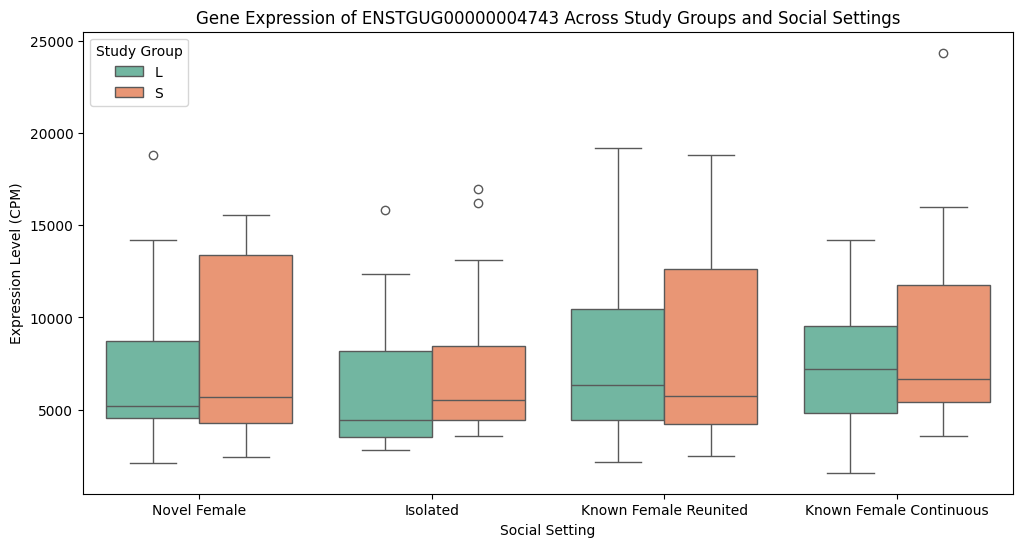

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized dataset
df = pd.read_csv(drive_path+'/dataset/normalized_dataset.csv')

# Select a gene for visualization (example: 'ENSTGUG00000004743', which is Brain-Derived Neurotrophic Factor gene)
selected_gene = 'ENSTGUG00000004743'

# Map the social setting abbreviations to full descriptions
social_setting_map = {
    'ISO': 'Isolated',
    'KFC': 'Known Female Continuous',
    'KF': 'Known Female Reunited',
    'NF': 'Novel Female'
}
df['social_settting'] = df['social_settting'].map(social_setting_map)

# Create a boxplot comparing gene expression across study groups and social settings
plt.figure(figsize=(12, 6))
sns.boxplot(x='social_settting', y=selected_gene, hue='study_group', data=df, palette="Set2")
plt.title('Gene Expression of ' + selected_gene + ' Across Study Groups and Social Settings')
plt.ylabel('Expression Level (CPM)')
plt.xlabel('Social Setting')
plt.legend(title='Study Group')
plt.show()


**Write down your interpretation of the result of this simple barplot, that displays expression level of `BDNF` gene. First, briefly describe `BDNF` and it's function. Then, write your interpretation about any notable observation you see from the plot**

**_Your Answer_**:

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer this question!</strong>
</blockquote>

The BDNF gene encodes the brain-derived neurotrophic factor (BDNF) protein, a crucial member of the neurotrophin family of growth factors. BDNF plays a pivotal role in fostering the survival of nerve cells within the brain and spinal cord, while also actively participating in synaptic plasticity, as well as facilitating processes associated with learning and memory.

The expression of the BDNF gene is regulated by a variety of factors, including neural activity, stress, and hormones. It is known to be upregulated in response to stress, which can lead to changes in synaptic plasticity and mood disorders. The expression of BDNF is also influenced by various hormones, including estrogen and testosterone.

We observe that the BDNF gene is expressed in a more diverse range when the bird is reunited with a known female compared to other social events. Additionally, we can say that the BDNF gene is expressed in a more limited range when the bird is isolated. This may be because the bird's experience is monotonous over time.            
Another aspect of the plot is that when the bird is reunited with a known female after a period of separation, its BDNF gene is expressed in a wider range than when continuously housed with a known female and can be expressed more. This may be because the bird experiences heightened stress or neural activity when exposed to this social situation.              

### Diverse Visualization Techniques for Gene Expression Data

A comprehensive exploration of gene expression data requires a multifaceted visualization approach. Beyond the boxplot, we will delve into additional techniques that can bring forth deeper insights from our dataset. You are tasked with implementation and interpretation of the results of at least one of the following visualization methods:

- **PCA (Principal Component Analysis)**: This technique reduces the dimensionality of the data and can reveal the underlying structure by capturing the most variation across samples.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: Particularly useful for visualizing high-dimensional data in a lower-dimensional space, t-SNE can help identify clusters of genes or samples.
- **UMAP (Uniform Manifold Approximation and Projection)**: Similar to t-SNE, UMAP is useful for visualization and can be faster and more scalable.

In addition to these, consider the following methods to further dissect the dataset:

- **Histograms and Density Plots**: Useful for showing the distribution of gene expression levels within individual samples or conditions.
- **Boxplots and Violin Plots**: These can summarize the distributions and highlight potential outliers in gene expression levels across samples.
- **Scatter Plots**: When exploring the relationship between different conditions, scatter plots can be particularly revealing.
- **Volcano Plots**: Ideal for showcasing differential expression results, highlighting genes with significant fold changes and statistical significance.

Each method will contribute to a holistic view of the dataset, enabling you to uncover patterns and anomalies that may not be apparent through a single visualization strategy.


#### **Your Turn to Explore**

- **Experiment with Different Genes**: Change the `selected_gene` variable to analyze other genes of interest.
- **Diverse Visualizations**: Consider using heatmaps, violin plots, or scatter plots for different perspectives.
- **Incorporate Statistical Analyses**: Complement visual insights with statistical tests to discern if the differences you observe are significant.

Remember, the goal is to thoroughly understand the dataset, paving the way for more in-depth analyses like differential gene expression or clustering.

In [ ]:
### TODO ###

# Load the normalized dataset
df = pd.read_csv(drive_path+'/dataset/normalized_dataset.csv')

dropped_df = df.dropna(axis='columns')
print('dataframe shape:', dropped_df.shape)
dropped_df.head()

dataframe shape: (131, 18184)


,sample_id,social_settting,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,GSM6175777,NF,L,HY3,7916.143473,5231.219920,8352.808004,5319.148936,6991.276372,7795.007878,...,9225.899161,8094.573516,10803.531348,0.0,0.000000,0.000000,4415.388212,5699.138502,9239.730843,13426.303687
1,GSM6175779,ISO,S,HY5,8134.519845,4394.224733,8562.769298,5319.148936,6836.602116,6302.346795,...,6810.088094,7109.432723,7825.826725,0.0,0.000000,0.000000,4562.268065,4903.909874,4854.206421,8753.059862
2,GSM6175780,ISO,L,HY6,6605.885243,6068.215108,5824.143723,14893.617021,7950.256759,10448.627581,...,7289.085116,6075.034890,5910.519228,0.0,10695.187166,3636.363636,3956.763368,2915.838304,5825.047705,8159.632075
3,GSM6175781,ISO,L,HY8,8680.460774,4603.473530,8215.876725,5319.148936,6248.839943,14760.759599,...,8705.250224,7142.270750,5820.739189,0.0,139037.433155,18181.818182,4622.219025,7554.671968,7331.525560,8604.702915
4,GSM6175782,ISO,L,HY9,9390.183982,7951.454279,6837.435186,4255.319149,6094.165687,7795.007878,...,5706.312348,5615.302520,4354.331887,0.0,0.000000,18181.818182,3797.893323,3180.914513,5255.933849,6527.705660


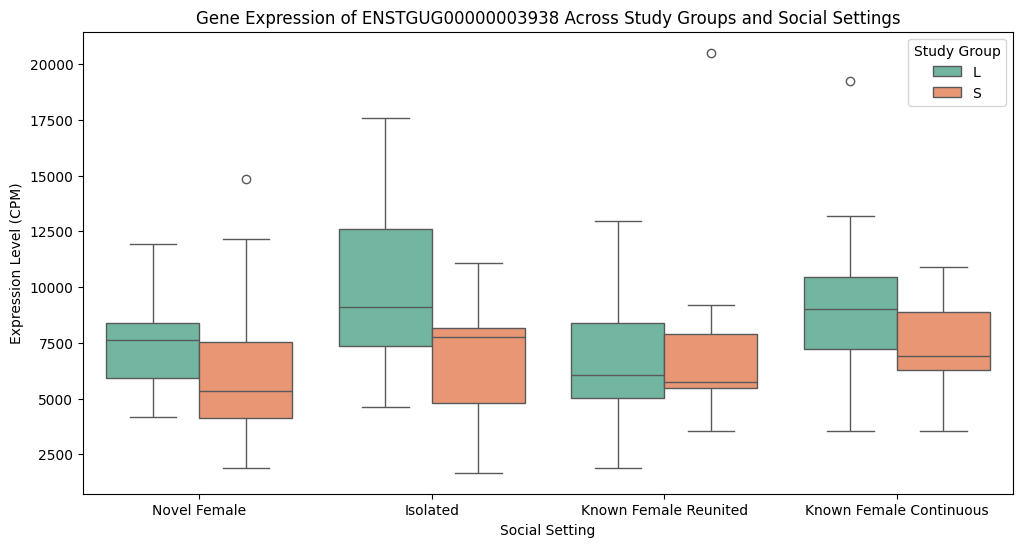

In [ ]:
selected_gene = 'ENSTGUG00000003938'

# Create a boxplot comparing gene expression across study groups and social settings
plt.figure(figsize=(12, 6))
sns.boxplot(x='social_settting', y=selected_gene, hue='study_group', data=df, palette="Set2")
plt.title('Gene Expression of ' + selected_gene + ' Across Study Groups and Social Settings')
plt.ylabel('Expression Level (CPM)')
plt.xlabel('Social Setting')
plt.legend(title='Study Group')
plt.show()

<Figure size 1200x600 with 0 Axes>

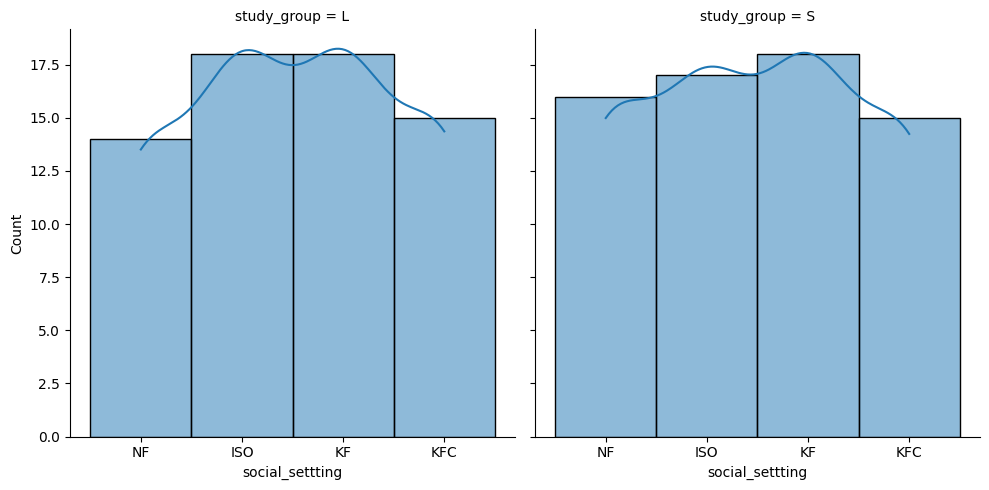

In [ ]:
# distribution of data in each social events and each group
plt.figure(figsize=(12, 6))
sns.displot(data=dropped_df, x="social_settting", col='study_group', kde=True)
plt.show()

###### **Scatter plot**
Selection of genes that are most different in different social events.     
I took 5000 most different genes based on gene expression mean in L & S groups.

In [ ]:
meanPerGroup = dropped_df.groupby(['study_group']).mean()
meanPerGroup

<ipython-input-15-9ef87eb42440>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanPerGroup = dropped_df.groupby(['study_group']).mean()


,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,ENSTGUG00000015152,ENSTGUG00000002407,ENSTGUG00000016201,ENSTGUG00000004296,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
study_group,,,,,,,,,,,,,,,,,,,,,
L,7745.641922,8350.636599,7525.743080,6595.744681,7547.151852,7226.010576,7052.335267,7499.989114,4307.692308,7523.647287,...,7875.415918,7655.806963,7304.411883,7692.307692,8309.337721,6601.398601,7573.973720,8070.551053,8325.543426,7658.642077
S,7523.231441,6927.403349,7739.798481,8655.705996,7718.714085,8034.989584,8206.033449,7765.162236,10909.090909,7741.862520,...,7395.423717,7611.705264,7957.776176,7575.757576,6968.076487,8650.137741,7692.298609,7203.245175,6952.116322,7608.913106


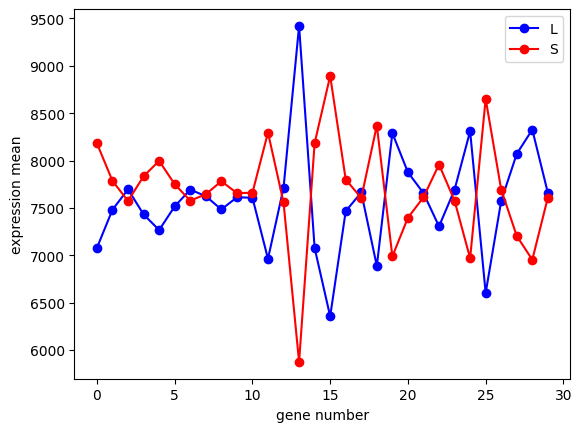

In [ ]:
# compare some genes between 2 groups with gene expression

plt.plot(range(30), meanPerGroup.T['L'][-30:], '-o', color='b', label='L')
plt.plot(range(30), meanPerGroup.T['S'][-30:], '-o', color='r', label='S')

plt.xlabel("gene number")
plt.ylabel("expression mean")

plt.legend()

plt.show()

In [ ]:
def row_difference(row1, row2):
    return abs(row1 - row2)

# Subtract row 2 from row 1
difference = meanPerGroup.copy()
difference.loc['difference'] = row_difference(difference.iloc[0], difference.iloc[1])
difference.head()

,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,ENSTGUG00000015152,ENSTGUG00000002407,ENSTGUG00000016201,ENSTGUG00000004296,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
study_group,,,,,,,,,,,,,,,,,,,,,
L,7745.641922,8350.636599,7525.743080,6595.744681,7547.151852,7226.010576,7052.335267,7499.989114,4307.692308,7523.647287,...,7875.415918,7655.806963,7304.411883,7692.307692,8309.337721,6601.398601,7573.973720,8070.551053,8325.543426,7658.642077
S,7523.231441,6927.403349,7739.798481,8655.705996,7718.714085,8034.989584,8206.033449,7765.162236,10909.090909,7741.862520,...,7395.423717,7611.705264,7957.776176,7575.757576,6968.076487,8650.137741,7692.298609,7203.245175,6952.116322,7608.913106
difference,222.410481,1423.233250,214.055401,2059.961315,171.562233,808.979008,1153.698181,265.173122,6601.398601,218.215233,...,479.992202,44.101699,653.364292,116.550117,1341.261234,2048.739140,118.324889,867.305877,1373.427104,49.728972


In [ ]:
sorted_columns = difference.loc['difference'].sort_values(ascending=False)

# Select the top 100 columns
top_gene = sorted_columns.head(5000)

# Get the column names of the top 100 columns
top_gene_names = top_gene.index

print(top_gene_names)
# dropped_df.head()
top_genes_df = difference[top_gene_names]
top_genes_df.head()

Index(['ENSTGUG00000018677', 'ENSTGUG00000016322', 'ENSTGUG00000013873',
       'ENSTGUG00000018274', 'ENSTGUG00000005970', 'ENSTGUG00000005699',
       'ENSTGUG00000013559', 'ENSTGUG00000017795', 'ENSTGUG00000015110',
       'ENSTGUG00000017877',
       ...
       'ENSTGUG00000013943', 'ENSTGUG00000018382', 'ENSTGUG00000018596',
       'ENSTGUG00000012996', 'ENSTGUG00000015780', 'ENSTGUG00000017641',
       'ENSTGUG00000011397', 'ENSTGUG00000002390', 'ENSTGUG00000008550',
       'ENSTGUG00000009089'],
      dtype='object', length=5000)


,ENSTGUG00000018677,ENSTGUG00000016322,ENSTGUG00000013873,ENSTGUG00000018274,ENSTGUG00000005970,ENSTGUG00000005699,ENSTGUG00000013559,ENSTGUG00000017795,ENSTGUG00000015110,ENSTGUG00000017877,...,ENSTGUG00000013943,ENSTGUG00000018382,ENSTGUG00000018596,ENSTGUG00000012996,ENSTGUG00000015780,ENSTGUG00000017641,ENSTGUG00000011397,ENSTGUG00000002390,ENSTGUG00000008550,ENSTGUG00000009089
study_group,,,,,,,,,,,,,,,,,,,,,
L,15384.615385,15384.615385,15384.615385,15384.615385,15384.615385,15384.615385,15384.615385,15384.615385,15384.615385,15384.615385,...,8234.528629,7032.967033,7032.967033,7032.967033,7033.327033,8233.148932,8233.145640,8233.018905,7034.674025,8232.153967
S,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7041.752108,8225.108225,8225.108225,8225.108225,8224.753679,7043.110900,7043.114142,7043.238957,8223.427097,7044.090791
difference,15384.615385,15384.615385,15384.615385,15384.615385,15384.615385,15384.615385,15384.615385,15384.615385,15384.615385,15384.615385,...,1192.776522,1192.141192,1192.141192,1192.141192,1191.426646,1190.038032,1190.031497,1189.779948,1188.753072,1188.063176


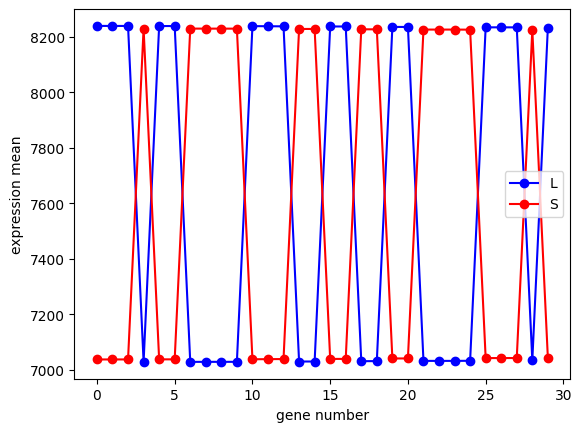

In [ ]:
# compare some genes between 2 groups with gene expression

plt.plot(range(30), top_genes_df.T['L'][-30:], '-o', color='b', label='L')
plt.plot(range(30), top_genes_df.T['S'][-30:], '-o', color='r', label='S')

plt.xlabel("gene number")
plt.ylabel("expression mean")

plt.legend()

plt.show()

In [ ]:
ensembl_ids[18]

'ENSTGUG00000006732'

In [ ]:
top_genes_df = dropped_df[['sample_id', 'social_settting', 'study_group', 'tissue_id'] + list(top_gene_names)]
top_genes_df.head()

,sample_id,social_settting,study_group,tissue_id,ENSTGUG00000018677,ENSTGUG00000016322,ENSTGUG00000013873,ENSTGUG00000018274,ENSTGUG00000005970,ENSTGUG00000005699,...,ENSTGUG00000013943,ENSTGUG00000018382,ENSTGUG00000018596,ENSTGUG00000012996,ENSTGUG00000015780,ENSTGUG00000017641,ENSTGUG00000011397,ENSTGUG00000002390,ENSTGUG00000008550,ENSTGUG00000009089
0,GSM6175777,NF,L,HY3,0.000000,0.0,0.0,600000.0,0.0,0.0,...,19266.917293,0.0,0.0,28571.428571,3112.203112,11249.497790,7609.191904,5643.919959,12810.643749,6261.414036
1,GSM6175779,ISO,S,HY5,0.000000,0.0,0.0,0.0,0.0,0.0,...,8928.571429,0.0,0.0,0.000000,5405.405405,8838.891121,8065.743418,9748.589020,11305.536726,3391.599270
2,GSM6175780,ISO,L,HY6,74074.074074,0.0,0.0,0.0,0.0,0.0,...,5639.097744,0.0,0.0,0.000000,1965.601966,7633.587786,9435.397961,5387.378143,4860.002068,4956.952779
3,GSM6175781,ISO,L,HY8,37037.037037,0.0,0.0,0.0,0.0,0.0,...,13157.894737,0.0,0.0,0.000000,6060.606061,10445.962234,14685.740374,13083.632632,8835.322909,0.000000
4,GSM6175782,ISO,L,HY9,0.000000,0.0,0.0,0.0,0.0,0.0,...,2819.548872,0.0,0.0,0.000000,3112.203112,2410.606669,6315.629280,6413.545408,8077.024714,2087.138012


##### **with PCA**       
In this section, I applied PCA on lsp group samples To see if there is a pattern between different social events.

###### **Finding trend in L & S groups of samples**

In [ ]:
features = top_genes_df.columns
x = top_genes_df.loc[:, features[4:]].values
print('number of NAN elements:', np.count_nonzero(np.isnan(x)))
x[np.isnan(x)] = 0 # handel NAN elements
print('x shape:', x.shape)

number of NAN elements: 0
x shape: (131, 5000)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA

pca_geneExpression = PCA(n_components=2)
principalComponents_geneExpression = pca_geneExpression.fit_transform(x_scaled)

In [ ]:
col_names = list(features[:4])+['principal component 1', 'principal component 2']
data = np.concatenate( (top_genes_df.loc[:, features[:4]].values, principalComponents_geneExpression), axis=1)

In [ ]:
principal_dataframe= pd.DataFrame(data = data, columns = col_names)

principal_dataframe.head()

,sample_id,social_settting,study_group,tissue_id,principal component 1,principal component 2
0,GSM6175777,NF,L,HY3,8.652427,31.68752
1,GSM6175779,ISO,S,HY5,-20.748302,14.708579
2,GSM6175780,ISO,L,HY6,1.796546,14.308657
3,GSM6175781,ISO,L,HY8,50.451197,41.743256
4,GSM6175782,ISO,L,HY9,9.980935,15.154046


<Figure size 640x480 with 0 Axes>

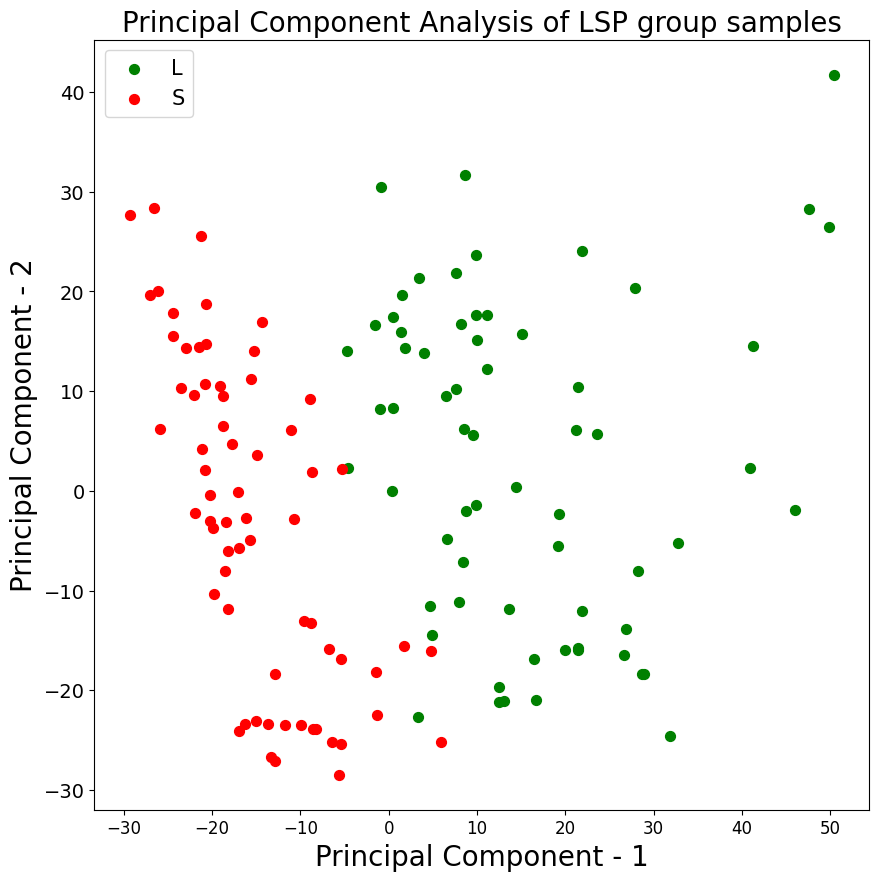

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of LSP group samples",fontsize=20)
study_groups = ['L', 'S']
colors = ['g', 'r']
for study_group, color in zip(study_groups,colors):
    indicesToKeep = principal_dataframe['study_group'] == study_group
    plt.scatter(principal_dataframe.loc[indicesToKeep, 'principal component 1']
               , principal_dataframe.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(study_groups, prop={'size': 15})


**RESULT:**
We observe after applying PCA, the samples easily can be seperated to 2 clusters.

###### **Finding trend in social events of LSP group samples**

In [ ]:
lsp_df = top_genes_df[top_genes_df['study_group'] == 'L']

features = lsp_df.columns
x = lsp_df.loc[:, features[4:]].values
print('number of NAN elements:', np.count_nonzero(np.isnan(x)))
x[np.isnan(x)] = 0 # handel NAN elements
print('x shape:', x.shape)

number of NAN elements: 0
x shape: (65, 5000)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA

pca_geneExpression = PCA(n_components=2)
principalComponents_geneExpression = pca_geneExpression.fit_transform(x_scaled)

In [ ]:
col_names = list(features[:4])+['principal component 1', 'principal component 2']
data = np.concatenate( (lsp_df.loc[:, features[:4]].values, principalComponents_geneExpression), axis=1)

In [ ]:
principal_dataframe= pd.DataFrame(data = data, columns = col_names)

principal_dataframe.head()

,sample_id,social_settting,study_group,tissue_id,principal component 1,principal component 2
0,GSM6175777,NF,L,HY3,-29.887966,-4.320928
1,GSM6175780,ISO,L,HY6,-15.493872,-10.546535
2,GSM6175781,ISO,L,HY8,-37.023879,63.749966
3,GSM6175782,ISO,L,HY9,-14.385115,-1.109178
4,GSM6175785,ISO,L,HY14,-11.794162,-17.243368


<Figure size 640x480 with 0 Axes>

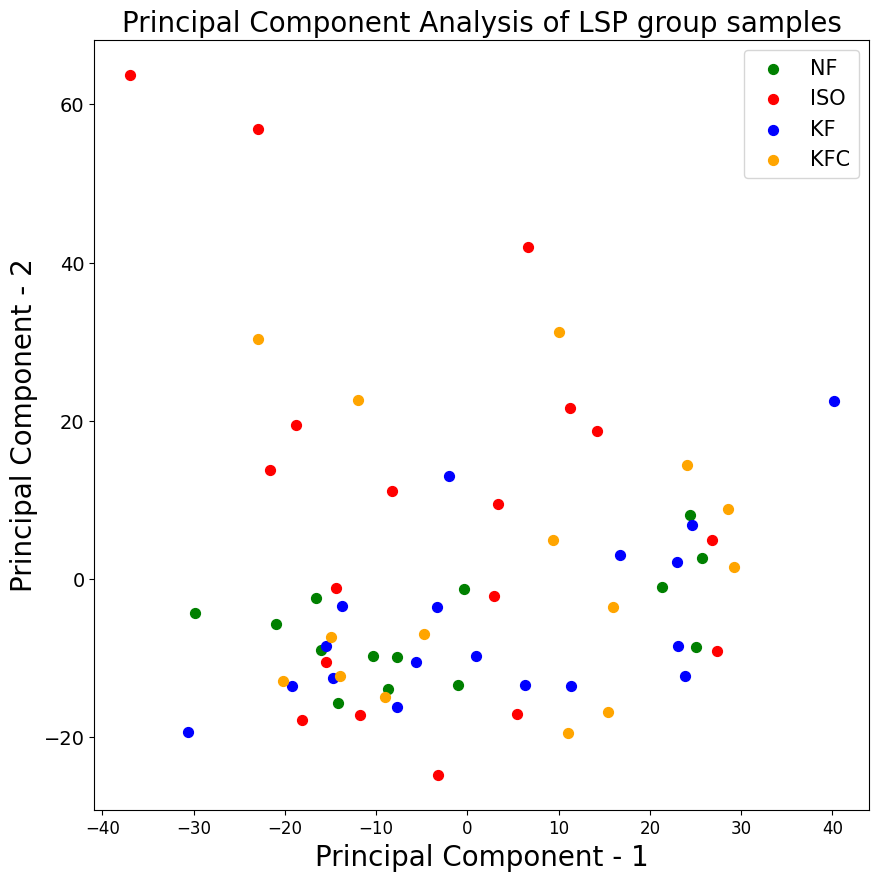

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of LSP group samples",fontsize=20)
social_setttings = ['NF', 'ISO', 'KF', 'KFC']
colors = ['g', 'r', 'b', 'orange']
for ss, color in zip(social_setttings,colors):
    indicesToKeep = principal_dataframe['social_settting'] == ss
    plt.scatter(principal_dataframe.loc[indicesToKeep, 'principal component 1']
               , principal_dataframe.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(social_setttings, prop={'size': 15})


**RESULT:**
There is no obvious pattern in the above plot. So we can not seperate these 4 social events by 5000 genes.

###### **Finding trend in tissue_id of each group(such as LSP group)**

<Figure size 640x480 with 0 Axes>

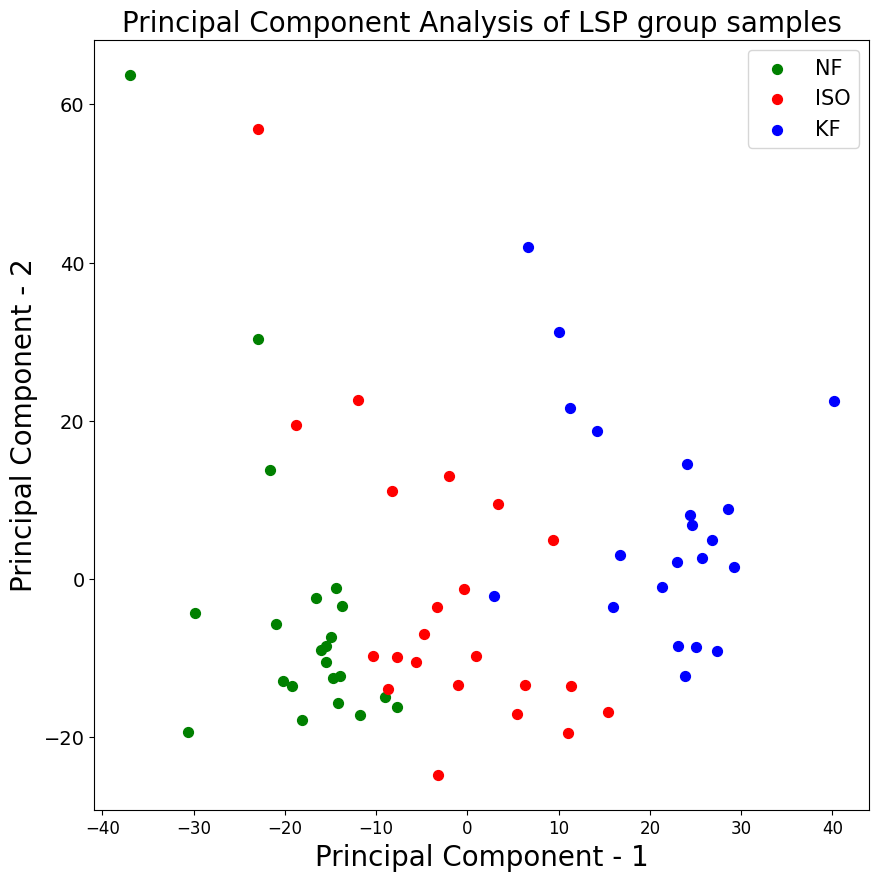

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of LSP group samples",fontsize=20)
tissue_ids = ['HY', 'NST', 'TN']
colors = ['g', 'r', 'b']
for tissue_id, color in zip(tissue_ids, colors):
    indicesToKeep = principal_dataframe['tissue_id'].str.startswith(tissue_id)
    plt.scatter(principal_dataframe.loc[indicesToKeep, 'principal component 1']
               , principal_dataframe.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(social_setttings, prop={'size': 15})


**RESULT:**
With this visualization, we can somewhat separate samples into three tissue IDs

##### **tSNE**

###### **Finding trend in L & S groups of samples**

In [ ]:
features = top_genes_df.columns
x = top_genes_df.loc[:, features[4:]].values
print('number of NAN elements:', np.count_nonzero(np.isnan(x)))
x[np.isnan(x)] = 0 # handel NAN elements
print('x shape:', x.shape)

number of NAN elements: 0
x shape: (131, 5000)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 0)
print(x_scaled.shape)
tsne_data = tsne.fit_transform(x_scaled)
print(tsne_data.shape)

(131, 5000)
(131, 2)


In [ ]:
col_names = list(features[:4])+['Dim 1', 'Dim 2']
data = np.concatenate( (top_genes_df.loc[:, features[:4]].values, tsne_data), axis=1)

In [ ]:
tsne_dataframe = pd.DataFrame(data = data, columns = col_names)

tsne_dataframe.head()

,sample_id,social_settting,study_group,tissue_id,Dim 1,Dim 2
0,GSM6175777,NF,L,HY3,-1.121004,1.284785
1,GSM6175779,ISO,S,HY5,4.599638,-3.094987
2,GSM6175780,ISO,L,HY6,-4.604273,-0.251344
3,GSM6175781,ISO,L,HY8,-10.255605,-0.06821
4,GSM6175782,ISO,L,HY9,-6.134769,-0.118298


<Figure size 640x480 with 0 Axes>

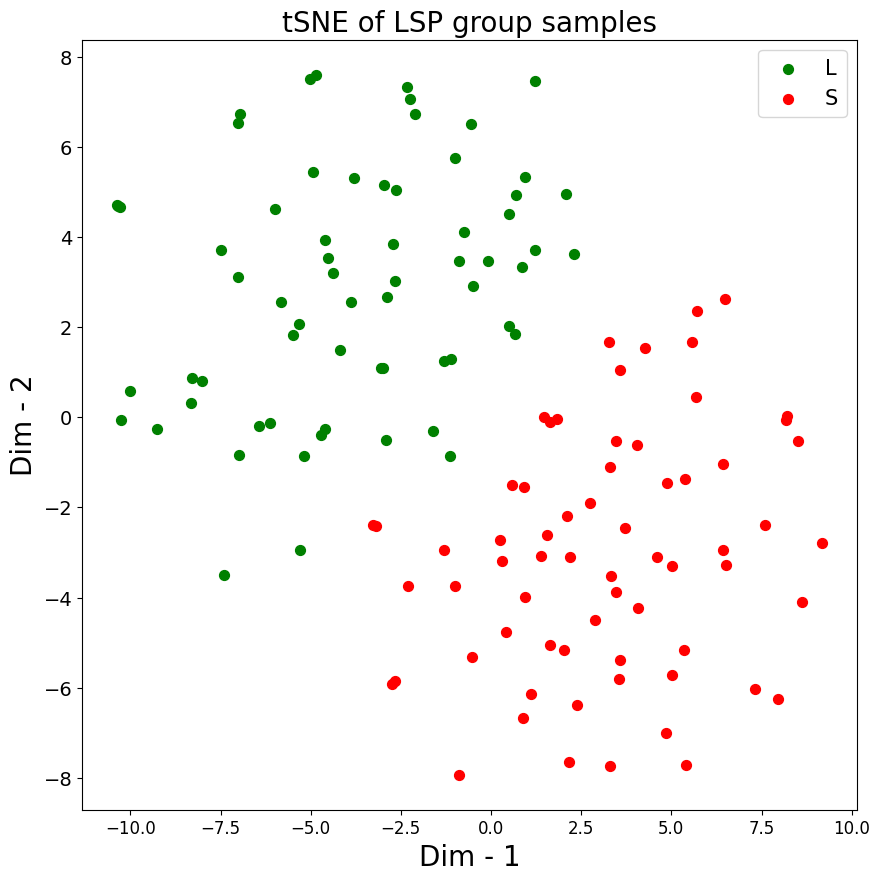

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Dim - 1',fontsize=20)
plt.ylabel('Dim - 2',fontsize=20)
plt.title("tSNE of LSP group samples",fontsize=20)
study_groups = ['L', 'S']
colors = ['g', 'r']
for study_group, color in zip(study_groups,colors):
    indicesToKeep = tsne_dataframe['study_group'] == study_group
    plt.scatter(tsne_dataframe.loc[indicesToKeep, 'Dim 1']
               , tsne_dataframe.loc[indicesToKeep, 'Dim 2'], c = color, s = 50)

plt.legend(study_groups, prop={'size': 15})

**RESULT:**
We observe after applying tSNE, the samples are seperated to 2 clusters even clearer than PCA.

###### **Finding trend in social events of LSP group samples**

In [ ]:
lsp_df = top_genes_df[top_genes_df['study_group'] == 'L']

features = lsp_df.columns
x = lsp_df.loc[:, features[4:]].values
print('number of NAN elements:', np.count_nonzero(np.isnan(x)))
x[np.isnan(x)] = 0 # handel NAN elements
print('x shape:', x.shape)

number of NAN elements: 0
x shape: (65, 5000)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 0)
print(x_scaled.shape)
tsne_data = tsne.fit_transform(x_scaled)
print(tsne_data.shape)

(65, 5000)
(65, 2)


In [ ]:
col_names = list(features[:4])+['Dim 1', 'Dim 2']
data = np.concatenate( (lsp_df.loc[:, features[:4]].values, tsne_data), axis=1)

In [ ]:
tsne_dataframe = pd.DataFrame(data = data, columns = col_names)

tsne_dataframe.head()

,sample_id,social_settting,study_group,tissue_id,Dim 1,Dim 2
0,GSM6175777,NF,L,HY3,-1.893109,-0.467866
1,GSM6175780,ISO,L,HY6,0.41809,-0.377474
2,GSM6175781,ISO,L,HY8,0.43931,-3.347747
3,GSM6175782,ISO,L,HY9,-0.204642,-0.983812
4,GSM6175785,ISO,L,HY14,1.591391,0.515626


<Figure size 640x480 with 0 Axes>

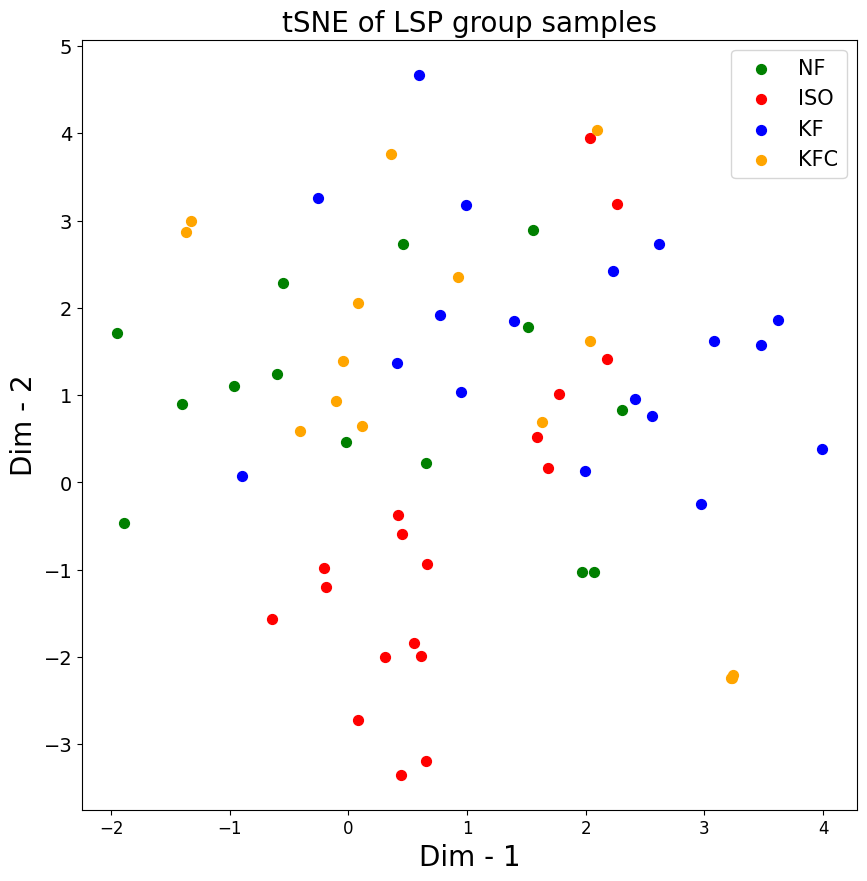

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Dim - 1',fontsize=20)
plt.ylabel('Dim - 2',fontsize=20)
plt.title("tSNE of LSP group samples",fontsize=20)
social_setttings = ['NF', 'ISO', 'KF', 'KFC']
colors = ['g', 'r', 'b', 'orange']
for ss, color in zip(social_setttings,colors):
    indicesToKeep = tsne_dataframe['social_settting'] == ss
    plt.scatter(tsne_dataframe.loc[indicesToKeep, 'Dim 1']
               , tsne_dataframe.loc[indicesToKeep, 'Dim 2'], c = color, s = 50)

plt.legend(social_setttings, prop={'size': 15})


**RESULT:**
There is no obvious pattern in the above plot. So we can not seperate these 4 social events by 5000 genes.

###### **Finding trend in tissue_id of LSP group samples with all genes**

In [ ]:
lsp_df = dropped_df[dropped_df['study_group'] == 'L']

features = lsp_df.columns
x = lsp_df.loc[:, features[4:]].values
print('number of NAN elements:', np.count_nonzero(np.isnan(x)))
x[np.isnan(x)] = 0 # handel NAN elements
print('x shape:', x.shape)

number of NAN elements: 0
x shape: (65, 18180)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 0)
print(x_scaled.shape)
tsne_data = tsne.fit_transform(x_scaled)
print(tsne_data.shape)

(65, 18180)
(65, 2)


In [ ]:
col_names = list(features[:4])+['Dim 1', 'Dim 2']
data = np.concatenate( (lsp_df.loc[:, features[:4]].values, tsne_data), axis=1)

In [ ]:
tsne_dataframe = pd.DataFrame(data = data, columns = col_names)

tsne_dataframe.head()

,sample_id,social_settting,study_group,tissue_id,Dim 1,Dim 2
0,GSM6175777,NF,L,HY3,-0.28181,0.068605
1,GSM6175780,ISO,L,HY6,1.385596,-2.06417
2,GSM6175781,ISO,L,HY8,-2.096378,-1.835609
3,GSM6175782,ISO,L,HY9,0.958101,-2.509867
4,GSM6175785,ISO,L,HY14,0.606967,-2.0882


<Figure size 640x480 with 0 Axes>

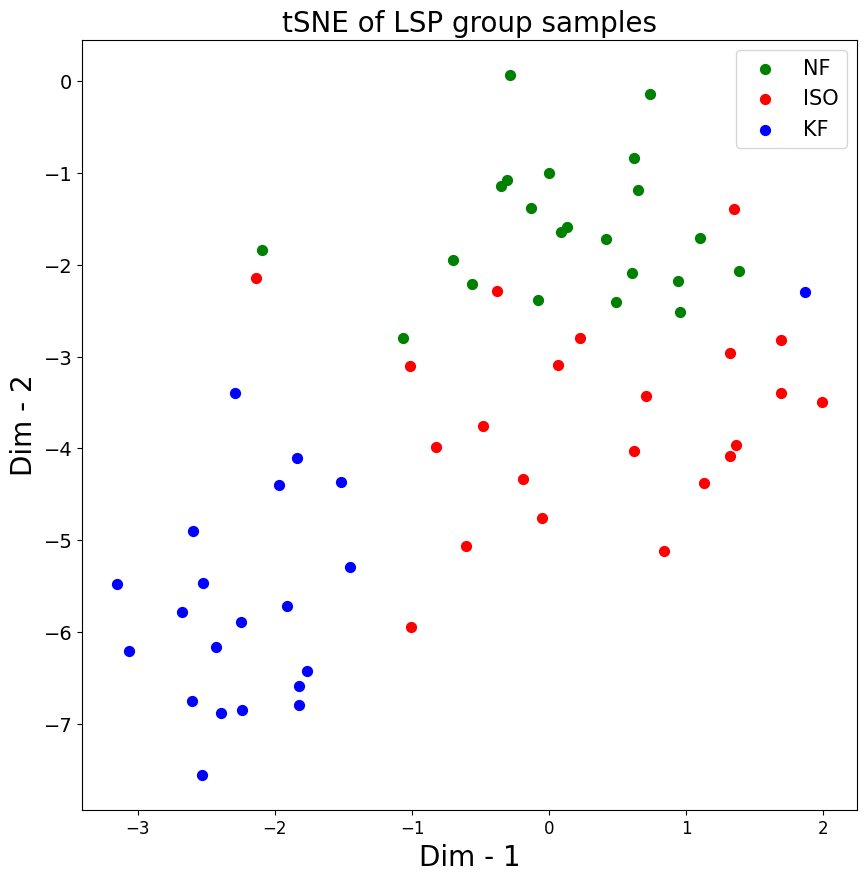

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Dim - 1',fontsize=20)
plt.ylabel('Dim - 2',fontsize=20)
plt.title("tSNE of LSP group samples",fontsize=20)
tissue_ids = ['HY', 'NST', 'TN']
colors = ['g', 'r', 'b']
for tissue_id, color in zip(tissue_ids, colors):
    indicesToKeep = tsne_dataframe['tissue_id'].str.startswith(tissue_id)
    plt.scatter(tsne_dataframe.loc[indicesToKeep, 'Dim 1']
               , tsne_dataframe.loc[indicesToKeep, 'Dim 2'], c = color, s = 50)

plt.legend(social_setttings, prop={'size': 15})


<Figure size 640x480 with 0 Axes>

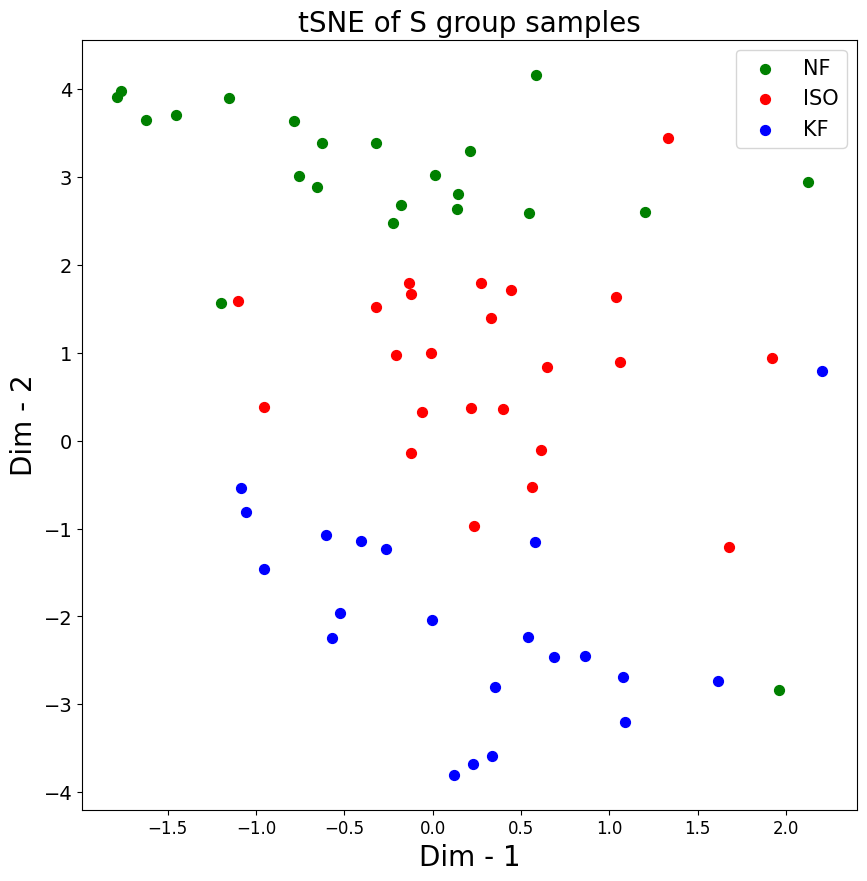

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Dim - 1',fontsize=20)
plt.ylabel('Dim - 2',fontsize=20)
plt.title("tSNE of S group samples",fontsize=20)
tissue_ids = ['HY', 'NST', 'TN']
colors = ['g', 'r', 'b']
for tissue_id, color in zip(tissue_ids, colors):
    indicesToKeep = tsne_dataframe['tissue_id'].str.startswith(tissue_id)
    plt.scatter(tsne_dataframe.loc[indicesToKeep, 'Dim 1']
               , tsne_dataframe.loc[indicesToKeep, 'Dim 2'], c = color, s = 50)

plt.legend(social_setttings, prop={'size': 15})

**RESULT:**
both plots for lsp group or S group can be seperated to 3 different social events easily with these 2 feature generated by tSNE.

##### **Histogram**

In [ ]:
df = dropped_df.copy()
df.head()

,sample_id,social_settting,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,GSM6175777,NF,L,HY3,7916.143473,5231.219920,8352.808004,5319.148936,6991.276372,7795.007878,...,9225.899161,8094.573516,10803.531348,0.0,0.000000,0.000000,4415.388212,5699.138502,9239.730843,13426.303687
1,GSM6175779,ISO,S,HY5,8134.519845,4394.224733,8562.769298,5319.148936,6836.602116,6302.346795,...,6810.088094,7109.432723,7825.826725,0.0,0.000000,0.000000,4562.268065,4903.909874,4854.206421,8753.059862
2,GSM6175780,ISO,L,HY6,6605.885243,6068.215108,5824.143723,14893.617021,7950.256759,10448.627581,...,7289.085116,6075.034890,5910.519228,0.0,10695.187166,3636.363636,3956.763368,2915.838304,5825.047705,8159.632075
3,GSM6175781,ISO,L,HY8,8680.460774,4603.473530,8215.876725,5319.148936,6248.839943,14760.759599,...,8705.250224,7142.270750,5820.739189,0.0,139037.433155,18181.818182,4622.219025,7554.671968,7331.525560,8604.702915
4,GSM6175782,ISO,L,HY9,9390.183982,7951.454279,6837.435186,4255.319149,6094.165687,7795.007878,...,5706.312348,5615.302520,4354.331887,0.0,0.000000,18181.818182,3797.893323,3180.914513,5255.933849,6527.705660


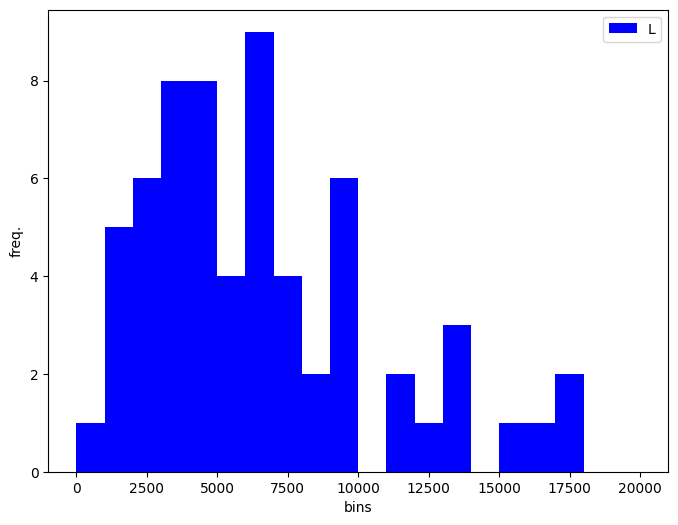

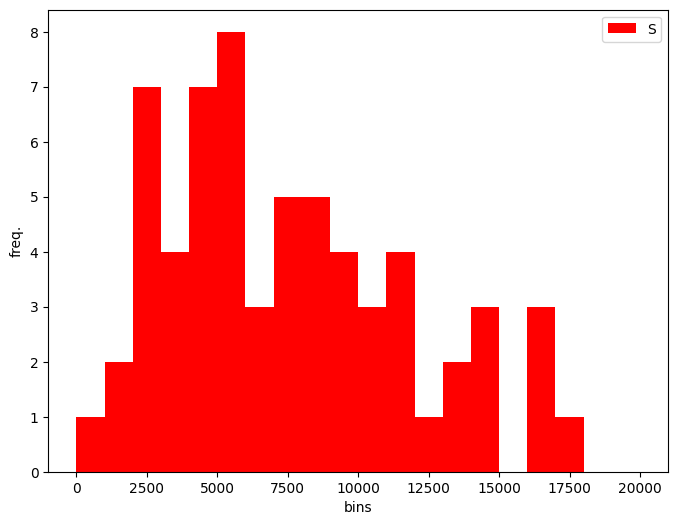

In [ ]:
selected_gene = 'ENSTGUG00000015780'

plt.figure(figsize=(8,6))
plt.hist(df[df['study_group'] == 'L'][selected_gene], bins=range(0, 21000, 1000), color='b', label='L')
plt.xlabel("bins")
plt.ylabel("freq.")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.hist(df[df['study_group'] == 'S'][selected_gene], bins=range(0, 21000, 1000), color='r', label='S')
plt.xlabel("bins")
plt.ylabel("freq.")
plt.legend()
plt.show()

**There is one outlier sample which expressed the ENSTGUG00000008284 gene more than 17500 in S group**

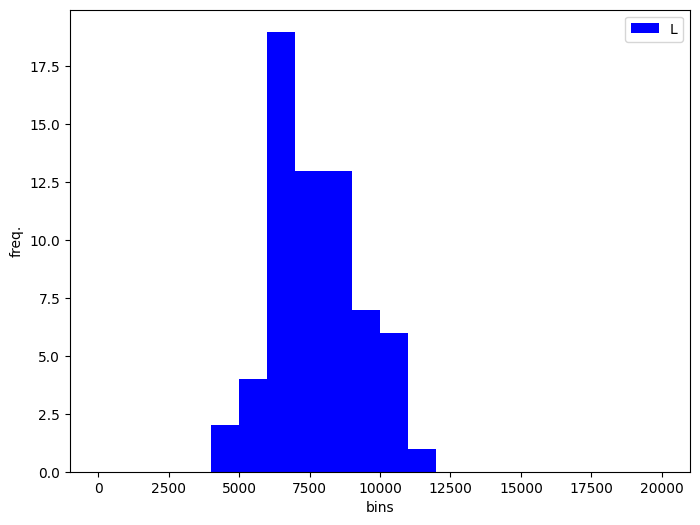

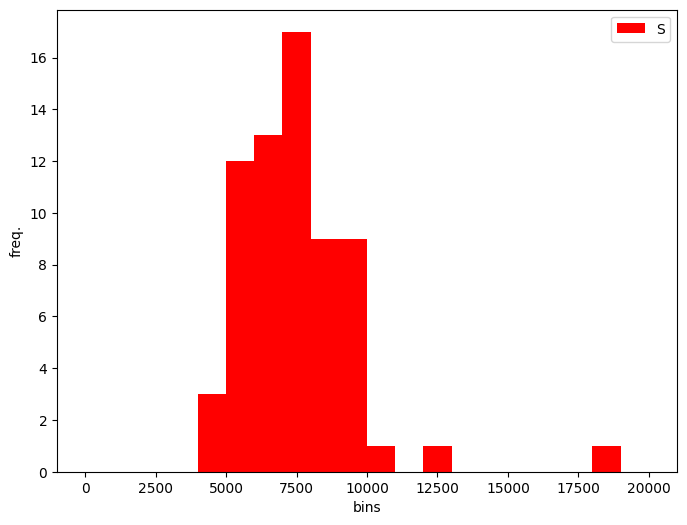

In [ ]:
selected_gene = 'ENSTGUG00000008284'

plt.figure(figsize=(8,6))
plt.hist(df[df['study_group'] == 'L'][selected_gene], bins=range(0, 21000, 1000), color='b', label='L')
plt.xlabel("bins")
plt.ylabel("freq.")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.hist(df[df['study_group'] == 'S'][selected_gene], bins=range(0, 21000, 1000), color='r', label='S')
plt.xlabel("bins")
plt.ylabel("freq.")
plt.legend()
plt.show()

##### **Heatmap**

In [ ]:
meanPer2Groups = dropped_df.groupby(['study_group', 'social_settting']).mean()
meanPer2Groups = meanPer2Groups.reset_index()
meanPer2Groups.head()

<ipython-input-225-f3382a2ee317>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanPer2Groups = dropped_df.groupby(['study_group', 'social_settting']).mean()


,study_group,social_settting,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,ENSTGUG00000015152,ENSTGUG00000002407,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,L,ISO,8134.519845,9939.317849,7385.667454,7033.096927,7403.741055,9840.506399,5053.522529,7666.052376,...,7515.856653,7134.973410,6599.664156,5555.555556,16339.869281,6262.626263,6663.216156,7348.501583,8060.586448,7158.222684
1,L,KF,7773.592231,6742.461231,7347.630987,7269.503546,7182.041288,5814.007058,7252.510165,7229.968992,...,7836.344998,8056.262485,7236.437395,16666.666667,5347.593583,9696.969697,8063.737196,9115.676312,7943.415948,8015.396154
2,L,KFC,7362.923332,9192.997140,8178.753134,5035.460993,8230.732744,5810.321475,8274.831964,7579.045355,...,8123.511812,7709.274006,7918.599431,0.000000,3921.568627,5575.757576,7991.862656,8323.392975,8911.653443,7279.380857
3,L,NF,7619.775540,7473.171315,7235.187948,6838.905775,7468.556933,7196.758793,8055.051744,7548.944819,...,8122.123415,7753.292599,7639.853787,7142.857143,6493.506494,4155.844156,7667.513688,7384.265834,8529.534140,8249.705935
4,S,ISO,8160.211183,6769.814015,7878.112904,9824.780976,8286.900728,6975.507675,7494.618460,8707.485107,...,7687.228420,7886.921290,9674.239290,5882.352941,8807.801195,9839.572193,7654.855975,8123.806183,7886.854651,8460.709408


Index(['study_group', 'social_settting', 'ENSTGUG00000008284',
       'ENSTGUG00000003938', 'ENSTGUG00000011987', 'ENSTGUG00000017592',
       'ENSTGUG00000009442', 'ENSTGUG00000009764', 'ENSTGUG00000015152',
       'ENSTGUG00000002407',
       ...
       'ENSTGUG00000010786', 'ENSTGUG00000004644', 'ENSTGUG00000006386',
       'ENSTGUG00000017785', 'ENSTGUG00000001573', 'ENSTGUG00000014656',
       'ENSTGUG00000003563', 'ENSTGUG00000002845', 'ENSTGUG00000009990',
       'ENSTGUG00000001666'],
      dtype='object', length=18182)


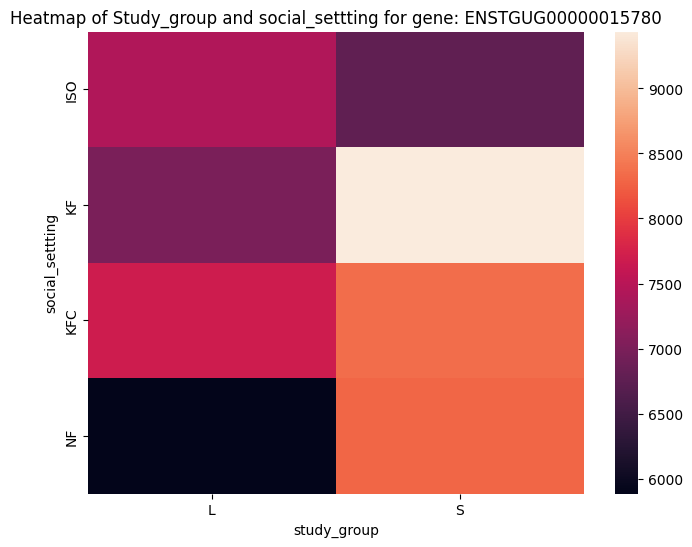

In [ ]:
# numeric_df = df.select_dtypes(include=['float', 'int'])

selected_gene = 'ENSTGUG00000015780'

plt.figure(figsize=(8, 6))
print(meanPer2Groups.columns)
pivot = meanPer2Groups.pivot(index='social_settting', columns='study_group', values=selected_gene)
sns.heatmap(pivot)
plt.title(f'Heatmap of Study_group and social_settting for gene: {selected_gene}')
plt.show()

In [ ]:
def chnageTissueID(x):
  if x.startswith('HY'):
    return 'HY'
  elif x.startswith('NST'):
    return 'NST'
  elif x.startswith('TN'):
    return 'TN'

# Apply the function to a specific column
merged_tissueID_df = dropped_df.copy()
merged_tissueID_df['tissue_id'] = merged_tissueID_df['tissue_id'].apply(chnageTissueID)
# merged_tissueID_df.head()

meanPer2Groups = merged_tissueID_df.groupby(['study_group', 'tissue_id']).mean()
meanPer2Groups = meanPer2Groups.reset_index()
meanPer2Groups

<ipython-input-228-7c7fdbed8703>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanPer2Groups = merged_tissueID_df.groupby(['study_group', 'tissue_id']).mean()


,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,ENSTGUG00000015152,ENSTGUG00000002407,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,L,HY,8161.816891,7219.083490,6959.013564,7833.655706,7262.659385,8880.579575,5791.296083,5658.124731,...,7294.764922,6895.239232,7338.157877,4545.454545,11424.404473,7438.016529,4567.309395,7699.258992,7010.447957,8817.123089
1,L,NST,6911.115854,7409.309669,6607.971558,6914.893617,7373.743623,5450.474561,6354.810238,4251.527102,...,7649.752834,7113.910636,6629.439691,0.000000,5833.738454,6446.280992,7248.343582,7801.674800,8264.324474,7293.092635
2,L,TN,8183.914500,10522.225211,9080.934645,4964.539007,8026.857343,7352.737927,9104.164444,12832.712004,...,8720.125908,9020.293118,7976.172663,19047.619048,7639.419404,5887.445887,11064.948872,8741.203572,9767.396631,6827.951862
3,S,HY,8375.230164,6229.907360,7633.296376,12088.974855,7259.847126,10840.639583,7251.001426,5580.075716,...,6855.526546,6700.450030,7865.275529,13636.363636,6319.883325,8264.462810,4341.539530,7145.008735,5545.055861,8274.271534
4,S,NST,6791.030428,6532.201570,7432.391669,7770.582794,7545.413707,5999.488024,7396.824366,4398.116054,...,7190.388187,7025.909917,7332.036511,4347.826087,6975.122065,7430.830040,6922.250642,6782.493445,6544.081580,7617.806704
5,S,TN,7432.595793,8090.953477,8188.055767,6028.368794,8389.237029,7325.096056,10092.819802,13742.017742,...,8185.592999,9207.938984,8740.015533,4761.904762,7639.419404,10389.610390,12046.003512,7725.078103,8873.074857,6902.130335


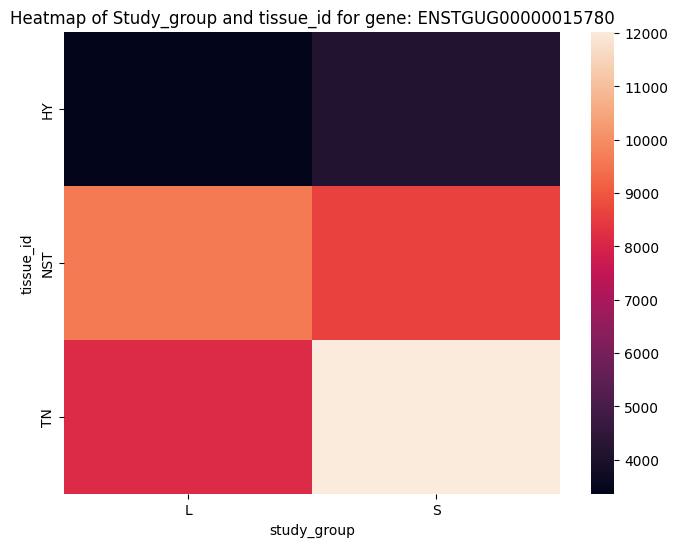

In [ ]:
plt.figure(figsize=(8, 6))
pivot = meanPer2Groups.pivot(index='tissue_id', columns='study_group', values='ENSTGUG00000015780')
sns.heatmap(pivot)
plt.title(f'Heatmap of Study_group and tissue_id for gene: {selected_gene}')
plt.show()

In [ ]:
meanPer2Groups = merged_tissueID_df.groupby(['social_settting', 'tissue_id']).mean()
meanPer2Groups = meanPer2Groups.reset_index()
meanPer2Groups

<ipython-input-231-20a30d75373c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanPer2Groups = merged_tissueID_df.groupby(['social_settting', 'tissue_id']).mean()


,social_settting,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,ENSTGUG00000015152,ENSTGUG00000002407,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,ISO,HY,8343.797201,6940.085095,6910.465201,11702.127660,7323.826022,9598.640020,5090.863829,5758.187570,...,7000.992704,6571.710040,7252.232032,0.000000,19162.210339,6969.696970,4178.831716,7300.640601,6279.780835,8326.533640
1,ISO,NST,7502.138269,8213.015275,7350.166752,7978.723404,8517.395698,6661.691130,5812.795619,4396.475272,...,7320.324052,7179.213529,7737.293631,8333.333333,7575.757576,7575.757576,6708.012845,7433.178706,7984.332630,7832.010484
2,ISO,TN,8635.792880,10196.123190,8703.850010,5222.437137,7640.908247,9144.433807,7957.091452,14923.657771,...,8555.681984,8863.281862,9398.337709,9090.909091,11181.332037,9586.776860,10857.118877,8506.536538,9817.974868,7161.594433
3,KF,HY,9399.282998,6347.213504,7465.036880,8776.595745,7362.494586,9674.655168,6870.799104,5611.952878,...,6705.958306,6911.036313,7712.354731,25000.000000,4901.960784,9393.939394,4538.037885,8504.528385,6070.547800,7850.555102
4,KF,NST,6651.380321,5911.278510,6746.147667,7358.156028,6408.670008,5106.835835,5974.607916,4003.371260,...,7367.182456,7136.797745,6131.228490,0.000000,4456.327986,8181.818182,7296.031846,7057.654076,6636.871882,7590.930445
5,KF,TN,7793.306764,8614.075469,8863.257382,6294.326241,8545.752645,7000.304061,8899.676375,13999.220082,...,8413.686819,9346.523274,7955.509003,25000.000000,6238.859180,9090.909091,12360.139406,9145.129225,9178.355819,6620.428752
6,KFC,HY,6824.261615,6988.909814,7270.138027,10000.000000,6954.154551,10291.068911,7244.212099,5451.251958,...,7343.232605,6749.856334,7978.452791,0.000000,5347.593583,11272.727273,4663.884942,7289.595759,6240.166047,8626.956457
7,KFC,NST,6207.348365,7616.656204,6744.321916,6063.829787,7640.908247,5133.095613,7587.752054,4237.975734,...,7634.796010,7097.939414,7997.905132,0.000000,6417.112299,3636.363636,8132.347740,8681.245858,8208.630444,7091.462058
8,KFC,TN,7484.850139,10190.416405,9170.744176,5319.148936,9462.970983,7322.331868,11725.168036,11581.787648,...,8384.530479,9058.369592,8503.666018,0.000000,6417.112299,5454.545455,10929.659538,7687.210073,9407.117271,6713.151843
9,NF,HY,8265.545668,6654.111739,7582.341342,9255.319149,7371.775042,9967.659010,7094.846901,5628.620488,...,7339.067414,6981.364420,7511.596588,10000.000000,4812.834225,3636.363636,4475.339173,6401.590457,6561.547990,9561.605222


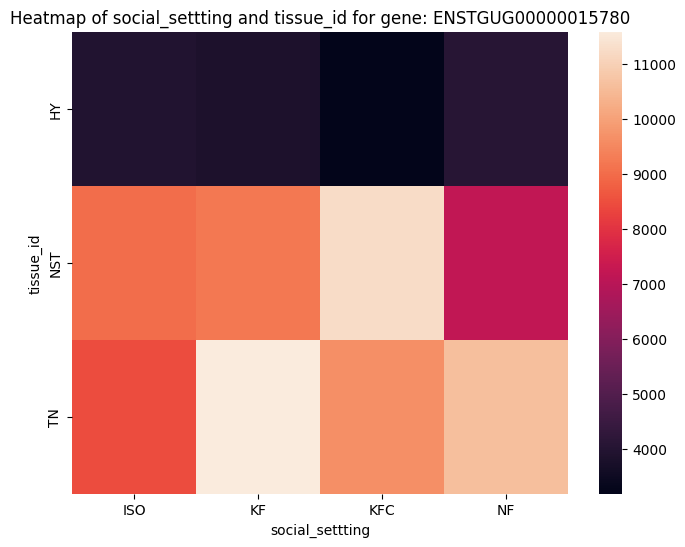

In [ ]:
plt.figure(figsize=(8, 6))
pivot = meanPer2Groups.pivot(index='tissue_id', columns='social_settting', values='ENSTGUG00000015780')
sns.heatmap(pivot)
plt.title(f'Heatmap of social_settting and tissue_id for gene: {selected_gene}')
plt.show()

### Reflecting on Visualizations to Extract Key Insights

As we have navigated through different visualization strategies, it's time to consolidate the knowledge you've gained. Reflect on the insights each visualization has provided:

- **What trends have you observed in the distribution of gene expression levels?**
- **How do the expression levels compare when you look across different conditions or samples?**
- **From the heatmap, were you able to detect any consistent patterns of expression, such as upregulation or downregulation of certain genes?**
- **Did any outliers or unusual expression patterns emerge? What might these suggest about certain genes or the overall data quality?**

Write down your observations and hypotheses. Discuss and note down your interpretations as they will be valuable for the upcoming stages of differential gene expression analysis.

**_Your Answer_**:

- Some gene are expressed very low in a conditions and some of them expressed much more. Sometimes a gene expressed almost same in two different conditions. For example, the ENSTGUG00000004644 gene is expressed almost the same in both the LSP group and the S group on average, based on my calculation of the mean gene expression differences.     
In some cases, we observe a gene that is expressed exclusively in either the LSP group or the S group. For example, the ENSTGUG00000018677 gene just expressed in LSP group.       
- We can visualize different conditions using histograms by plotting the expression of a specific gene in those conditions and observing their differences or similarities. Additionally, we can use scatter plots to show the mean expression of each gene in different conditions, or we can use Volcano plots to identify events that differ significantly between two groups of experimental subjects.     
- Yes, we can observe differences in gene expression levels across different conditions. For example, in the first heatmap figure, we observe that the ENSTGUG00000015780 gene is expressed more in birds in the S group and in known female reunited social settings compared to other social settings. Another instance can be seen in the second heatmap figure, where the ENSTGUG00000015780 gene shows higher expression levels in TN samples of S group birds compared to other regions.     
- Yes, outliers are observed in some cases. For example, in the second histogram plot, the S group contains a sample that exhibits unusual expression of the ENSTGUG00000008284 gene. Another instance is when we apply tSNE to separate the S and L groups, we observe an unusual sample that is far from the distribution of the rest of the group samples.

---


### Differential Gene Expression Analysis

After exploring the general patterns in our dataset, the next step is Differential Gene Expression (DGE) analysis. This process will help us identify genes whose expression levels significantly differ across treatments or social settings.

#### Addressing High Dimensionality in RNA-Seq Data for Differential Gene Expression Analysis

In RNA-Seq data, high dimensionality (a large number of genes) presents several analytical challenges. This complexity can obscure meaningful biological insights and impact the statistical power of our analyses.

**Challenges of High Dimensionality**:
1. **Statistical Power Loss**: With too many variables (genes), the risk of finding false positives increases, known as the 'multiple testing problem'.
2. **Overfitting Risk**: High-dimensional data can lead to models that are too complex, capturing noise rather than true underlying patterns.
3. **Computational Intensity**: Analyzing thousands of genes simultaneously demands significant computational resources and time.
4. **Interpretation Difficulty**: It becomes challenging to interpret results and extract biologically meaningful conclusions from a vast pool of data.

**Addressing These Challenges**:
1. **Dimensionality Reduction**: Techniques like PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding) help in reducing the number of dimensions, making the data more manageable and revealing hidden structures.
2. **RNA-Seq Specific Tools for DGE Analysis**: Tools like DESeq2 and edgeR (available in Python through rpy2 or similar interfaces) are designed to handle high-dimensional data. They offer:
   - **Normalization and Variance Stabilization**: Tailored for RNA-Seq data, ensuring fair comparisons across samples.
   - **FDR Control**: Implement procedures to adjust for multiple comparisons, reducing false positives.
   - **Biological Variance Modeling**: Consider the biological variability, enhancing the reliability of results.

**Python Implementation**:
- In python environments, the use of R-based tools like DESeq2 or edgeR is possible through interfaces such as `rpy2`. This approach allows you to leverage the strengths of these tools while working within a Python framework. However, as stated multiple times in this project, you have freedom to choose alternative method for any task, as long as it makes sense.



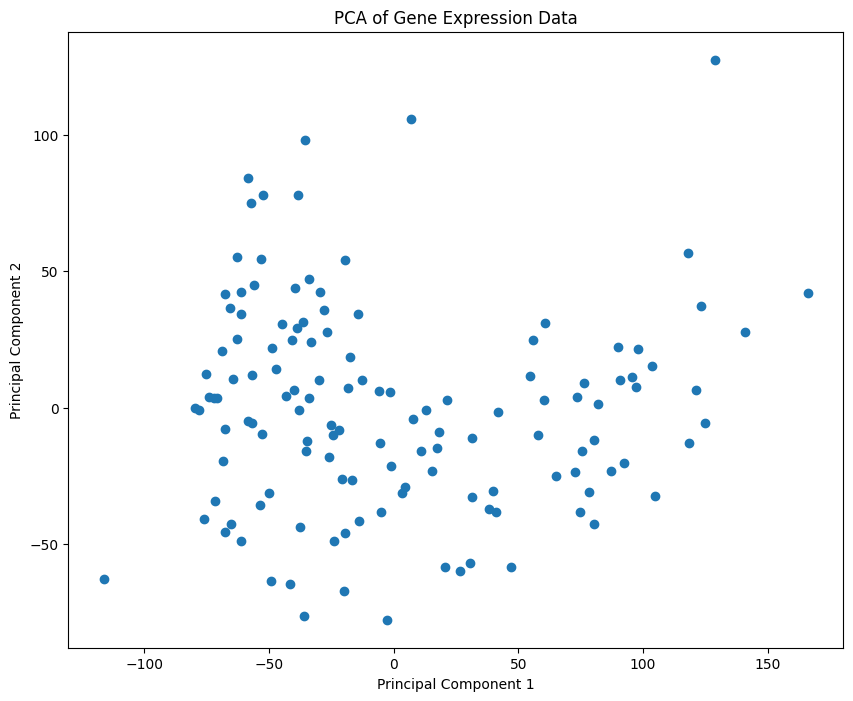

In [ ]:
### TODO ###
# Placeholder for PCA Analysis.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Note: Before applying PCA, it's important to standardize the data
# Example: Standardize the gene expression data (excluding metadata columns)

dataset = pd.read_csv(drive_path+'/dataset/transformed_dataset.csv')
features = dataset.columns

# Load your expression data here
expression_data = dataset.loc[:, features[4:]].values
# print(expression_data)

# Standardize the data
scaler = StandardScaler()
expression_scaled = scaler.fit_transform(expression_data)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(expression_scaled)

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data')
plt.show()

# Tip: Explore the variance ratio to decide on the number of components
# Tip: Use annotations or different colors to highlight groups based on treatment or social settings


In [ ]:
### TODO ###
# Placeholder for using a common RNA-Seq analysis tool from Python

import subprocess

# Example: Using DESeq2 via R for Differential Gene Expression Analysis
# DESeq2 is a popular tool for RNA-Seq data, particularly useful for identifying differentially expressed genes

# Define the paths and necessary arguments
r_script_path = drive_path+'/deseq2_analysis.r'
input_file_path = drive_path+'/dataset/normalized_dataset.csv'  # CSV file path
output_file_path = drive_path+'/deseq2_output.csv'      # Path to save the DESeq2 output

# Construct the command to run the R script using subprocess
command = ['Rscript', r_script_path, input_file_path]

# Run the command
subprocess.run(command)
# print(subprocess.call(command))

# Tips and Hints:
# - Ensure that R and DESeq2 are installed in your environment.
# - The R script should be written to take input and output file paths as arguments.
# - The script should handle the reading of the CSV file, applying DESeq2, and writing the results back to a CSV.
# - In the R script, consider using additional metadata columns (like 'study_group', 'social_settting') as part of the DESeq2 design formula to account for these factors in the analysis.
# - You can capture the output and errors from the subprocess to check if the script ran successfully.
# - For Python users not familiar with R, consider using Python alternatives or interfaces such as rpy2 to work with DESeq2.


CompletedProcess(args=['Rscript', '/content/drive/MyDrive/Bioinf/deseq2_analysis.r', '/content/drive/MyDrive/Bioinf/dataset/normalized_dataset.csv'], returncode=0)

In [ ]:
import rpy2.rinterface as rinterface
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

### Identifying Differentially Expressed Genes (DEGs)

The core of our RNA-Seq analysis lies in identifying Differentially Expressed Genes (DEGs) between different conditions, such as LPS treatment vs control, and across social settings. Identifying DEGs helps in pinpointing specific genes that are responsive to our experimental treatments.

**Freedom in Methodology**:
- You are free to choose your preferred method or tool for DEG analysis. Whether it's DESeq2, edgeR, or any other method, the key is to reliably identify genes that show statistically significant differences in expression.

### Interpreting the Findings

After identifying DEGs, the next crucial step is interpreting these findings. This involves understanding the biological functions and pathways these genes are involved in.

**Functional Annotation and Pathway Analysis**:
- Utilize databases like Gene Ontology (GO), Kyoto Encyclopedia of Genes and Genomes (KEGG), or DAVID for functional annotation.
- Interpret the roles of these genes in biological processes, cellular components, and molecular functions.

### Visualization for Insightful Understanding

A critical aspect of this phase is visualization. Effective visualizations can provide profound insights into the data and help in communicating your findings.

**Visualizations Can Include**:
- Heatmaps of DEGs.
- Volcano plots showing the significance vs. fold-change.
- Pathway diagrams to illustrate the affected biological pathways.

### Emphasis on Interpretation and Informative Visualization

Remember, the ultimate goal is to not only identify DEGs but to also understand their biological significance and visually represent this information in an insightful and informative manner. Your interpretations and visualizations are crucial for translating raw data into meaningful biological insights.


In [ ]:
### TODO ###
# Placeholder for DEG Analysis, Interpretation, and Visualization

# Step 1: DEG Analysis
# Use your chosen tool/method to identify DEGs
# Example: results = DESeq2_DEG_analysis(input_file)


# Step 2: Functional Annotation
# Utilize online databases or tools for gene annotation
# Example: annotated_genes = annotate_genes(results['gene_id'])

# Step 3: Pathway Analysis
# Map the DEGs to biological pathways
# Example: pathways = map_to_pathways(annotated_genes)

# Step 4: Visualization
# Create insightful visualizations of the DEGs
# Example: create_heatmap(results)
# Example: create_volcano_plot(results)
# Example: plot_pathways(pathways)

# Remember to interpret your findings in the context of the biological questions and hypotheses you are exploring.
# Consider the biological significance of the DEGs and their roles in the context of your study.

**I used PyDESeq2 lib to tun DEG analysis on python.**

#### **Step 1: DEG Analysis**

In [26]:
!pip install pydeseq2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 512.3 kB/s eta 0:00:00


In [27]:
read_counts = pd.read_csv(drive_path + '/dataset/transformed_dataset.csv', sep=',')
read_counts = read_counts.dropna(axis='columns')
sample_mappings = read_counts[['sample_id', 'social_settting', 'study_group', 'tissue_id']]#pd.read_csv(drive_path + '/dataset/sample_mappings.csv')

read_counts.drop(columns=['social_settting', 'study_group', 'tissue_id'], inplace=True)
read_counts.set_index('sample_id', inplace=True)
sample_mappings.set_index('sample_id', inplace=True)

In [28]:
read_counts.head()

,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,ENSTGUG00000015152,ENSTGUG00000002407,ENSTGUG00000016201,ENSTGUG00000004296,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM6175777,145,25,915,5,226,94,57,422,0,5013,...,443,493,722,0,0,0,1473,43,276,181
GSM6175779,149,21,938,5,221,76,51,407,0,4007,...,327,433,523,0,0,0,1522,37,145,118
GSM6175780,121,29,638,14,257,126,16,353,0,5513,...,350,370,395,0,2,1,1320,22,174,110
GSM6175781,159,22,900,5,202,178,33,298,0,3689,...,418,435,389,0,26,5,1542,57,219,116
GSM6175782,172,38,749,4,197,94,13,268,1,4162,...,274,342,291,0,0,5,1267,24,157,88


In [29]:
sample_mappings.head()

,social_settting,study_group,tissue_id
sample_id,,,
GSM6175777,NF,L,HY3
GSM6175779,ISO,S,HY5
GSM6175780,ISO,L,HY6
GSM6175781,ISO,L,HY8
GSM6175782,ISO,L,HY9


In [30]:
import pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

In [31]:
# Assuming you have already loaded your count data into a pandas DataFrame called count_data
dds = DeseqDataSet(
    counts=read_counts,
    metadata=sample_mappings,
    design_factors="study_group",
    refit_cooks=True,
)

<ipython-input-31-2494781002c4>:2: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


In [32]:
dds.deseq2()

Fitting size factors...
... done in 0.17 seconds.

Fitting dispersions...
... done in 37.54 seconds.

Fitting dispersion trend curve...
... done in 2.74 seconds.

Fitting MAP dispersions...
... done in 45.87 seconds.

Fitting LFCs...
... done in 18.92 seconds.

Refitting 55 outliers.

Fitting dispersions...
... done in 0.17 seconds.

Fitting MAP dispersions...
... done in 0.16 seconds.

Fitting LFCs...
... done in 0.14 seconds.



In [33]:
print(dds)

AnnData object with n_obs × n_vars = 131 × 18618
    obs: 'social_settting', 'study-group', 'tissue_id'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'


In [41]:
stat_res = DeseqStats(dds)
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: study-group S vs L
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSTGUG00000008284   139.532688       -0.018720  0.062971 -0.297286   
ENSTGUG00000003938    35.967245       -0.249501  0.100936 -2.471867   
ENSTGUG00000011987   823.687055        0.054608  0.052956  1.031196   
ENSTGUG00000017592     7.233779        0.403934  0.174887  2.309689   
ENSTGUG00000009442   244.108581        0.037595  0.054339  0.691854   
...                         ...             ...       ...       ...   
ENSTGUG00000014656     2.060085        0.360486  0.338991  1.063412   
ENSTGUG00000003563  2452.662301        0.025376  0.090273  0.281100   
ENSTGUG00000002845    57.097041       -0.146948  0.106800 -1.375923   
ENSTGUG00000009990   223.274451       -0.263861  0.050759 -5.198303   
ENSTGUG00000001666   102.317021       -0.007181  0.065733 -0.109250   

                          pvalue      padj  
ENSTGUG00000008284  7.662478e-01  0.918885  


... done in 5.78 seconds.



In [57]:
stat = stat_res.results_df.rename_axis('geneID')
stat.to_csv(drive_path + '/dataset/stat_res.csv')
stat.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
geneID,,,,,,
ENSTGUG00000008284,139.532688,-0.018720,0.062971,-0.297286,0.766248,0.918885
ENSTGUG00000003938,35.967245,-0.249501,0.100936,-2.471867,0.013441,0.094678
ENSTGUG00000011987,823.687055,0.054608,0.052956,1.031196,0.302449,0.623166
ENSTGUG00000017592,7.233779,0.403934,0.174887,2.309689,0.020905,0.128540
ENSTGUG00000009442,244.108581,0.037595,0.054339,0.691854,0.489029,0.772885


In [5]:
stat = pd.read_csv(drive_path + '/dataset/stat_res.csv')
stat.head()

,geneID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSTGUG00000008284,139.532688,-0.018720,0.062971,-0.297286,0.766248,0.918885
1,ENSTGUG00000003938,35.967245,-0.249501,0.100936,-2.471867,0.013441,0.094678
2,ENSTGUG00000011987,823.687055,0.054608,0.052956,1.031196,0.302449,0.623166
3,ENSTGUG00000017592,7.233779,0.403934,0.174887,2.309689,0.020905,0.128540
4,ENSTGUG00000009442,244.108581,0.037595,0.054339,0.691854,0.489029,0.772885


**Differentially expressed genes which are significant**


In [9]:
sigs = stat[(stat.padj < 0.05) & (abs(stat.log2FoldChange) > 0.5)]
sigs.head()

,geneID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
16,ENSTGUG00000013526,17.547391,-0.876379,0.140531,-6.236218,4.482766e-10,2.126396e-08
19,ENSTGUG00000002439,184.421518,-0.824287,0.124575,-6.616778,3.671127e-11,1.870964e-09
48,ENSTGUG00000017534,125.658564,-2.681887,0.125038,-21.448528,4.713334e-102,8.071113e-99
49,ENSTGUG00000013705,60.778940,0.680346,0.131892,5.158371,2.491081e-07,8.033384e-06
77,ENSTGUG00000012839,6.043040,-0.793682,0.206894,-3.836174,1.249658e-04,2.259677e-03


#### **Step 2: Functional Annotation**

Gene Ontology is a standardized system for annotating genes and their products across species. So, in this section I want query to mygene library to get gene ontology(GO) of each gene.

In [58]:
pip install mygene -q

In [59]:
import mygene
mg = mygene.MyGeneInfo()

**Zebra finch taxonomy ID: 59729**      
query to mygene to fetch gene ontology annotation.   

In [60]:
expression_data = pd.read_csv(drive_path+'/dataset/GSE203528_readcount.xls', sep='\t')
ensembl_ids = expression_data['geneID'].tolist()
print(len(ensembl_ids))
results = mg.getgenes(ensembl_ids, species='59729')

INFO:biothings.client:querying 1-1000...


18618


INFO:biothings.client:done.
INFO:biothings.client:querying 1001-2000...
INFO:biothings.client:done.
INFO:biothings.client:querying 2001-3000...
INFO:biothings.client:done.
INFO:biothings.client:querying 3001-4000...
INFO:biothings.client:done.
INFO:biothings.client:querying 4001-5000...
INFO:biothings.client:done.
INFO:biothings.client:querying 5001-6000...
INFO:biothings.client:done.
INFO:biothings.client:querying 6001-7000...
INFO:biothings.client:done.
INFO:biothings.client:querying 7001-8000...
INFO:biothings.client:done.
INFO:biothings.client:querying 8001-9000...
INFO:biothings.client:done.
INFO:biothings.client:querying 9001-10000...
INFO:biothings.client:done.
INFO:biothings.client:querying 10001-11000...
INFO:biothings.client:done.
INFO:biothings.client:querying 11001-12000...
INFO:biothings.client:done.
INFO:biothings.client:querying 12001-13000...
INFO:biothings.client:done.
INFO:biothings.client:querying 13001-14000...
INFO:biothings.client:done.
INFO:biothings.client:query

In [63]:
results[1]

{'query': 'ENSTGUG00000003938',
 '_id': '100232169',
 '_version': 1,
 'accession': {'genomic': ['NC_044226.2', 'RRCB02000024.1'],
  'protein': 'XP_030140444.3',
  'rna': ['GGLD01058869.1', 'XM_030284584.3'],
  'translation': {'protein': 'XP_030140444.3', 'rna': 'XM_030284584.3'}},
 'ensembl': {'gene': 'ENSTGUG00000003938',
  'protein': 'ENSTGUP00000032397',
  'transcript': 'ENSTGUT00000004087',
  'translation': [{'protein': 'ENSTGUP00000032397',
    'rna': 'ENSTGUT00000004087'}],
  'type_of_gene': 'protein_coding'},
 'entrezgene': '100232169',
 'genomic_pos': {'chr': '14',
  'end': 14487846,
  'ensemblgene': 'ENSTGUG00000003938',
  'start': 14485837,
  'strand': 1},
 'go': {'CC': {'evidence': 'IEA',
   'gocategory': 'CC',
   'id': 'GO:0005886',
   'pubmed': 30032202,
   'qualifier': 'located_in',
   'term': 'plasma membrane'},
  'MF': {'category': 'MF',
   'evidence': 'IEA',
   'id': 'GO:0005515',
   'pubmed': 22301074,
   'qualifier': 'enables',
   'term': 'protein binding'}},
 'inter

In [68]:
gene_names, gene_symbols, gene_gos = [], [], []
i = 0
for res in results:
  if res['query'] == ensembl_ids[i]:
    if 'notfound' in res.keys():
      gene_names.append('NA')
      gene_symbols.append('NA')
      gene_gos.append('NA')
    else:
      name = res['name'] if 'name' in res.keys() else 'NA'
      symbol = res['symbol'] if 'symbol' in res.keys() else 'NA'
      go = res['go'] if 'go' in res.keys() else 'NA'

      gene_names.append(name)
      gene_symbols.append(symbol)
      gene_gos.append(go)

    i+=1
  else:
    continue

print(len(gene_names), len(gene_symbols), len(gene_gos))
print(gene_names[:20])
print(gene_symbols[:20])
print(gene_gos[:20])

18618 18618 18618
['NA', 'vasorin', 'lysosomal protein transmembrane 4 beta', 'microRNA mir-125-2', 'proteasome 26S subunit, non-ATPase 6', 'CD38 molecule', 'NA', 'semaphorin 3D', 'NA', 'ATPase plasma membrane Ca2+ transporting 2', 'NA', 'NA', 'cysteine rich transmembrane BMP regulator 1', 'NA', 'NA', 'leucyl and cystinyl aminopeptidase', 'gap junction protein alpha 5', 'NME/NM23 family member 5', 'interleukin 22', 'scinderin']
['NA', 'VASN', 'LAPTM4B', 'MIR125-2', 'PSMD6', 'CD38', 'NA', 'SEMA3D', 'NA', 'ATP2B2', 'NA', 'NA', 'CRIM1', 'NA', 'NA', 'LNPEP', 'GJA5', 'NME5', 'IL22', 'SCIN']
['NA', {'CC': {'evidence': 'IEA', 'gocategory': 'CC', 'id': 'GO:0005886', 'pubmed': 30032202, 'qualifier': 'located_in', 'term': 'plasma membrane'}, 'MF': {'category': 'MF', 'evidence': 'IEA', 'id': 'GO:0005515', 'pubmed': 22301074, 'qualifier': 'enables', 'term': 'protein binding'}}, {'CC': {'evidence': 'IEA', 'gocategory': 'CC', 'id': 'GO:0005765', 'pubmed': 30032202, 'qualifier': 'located_in', 'term':

In [76]:
annotated_geneID = expression_data.copy()
annotated_geneID.insert(1, 'gene_names', gene_names)
annotated_geneID.insert(2, 'gene_symbols', gene_symbols)
annotated_geneID.insert(3, 'gene_gos', gene_gos)
annotated_geneID.head()

,geneID,gene_names,gene_symbols,gene_gos,HY3,HY4,HY5,HY6,HY8,HY9,...,TN62,TN63,TN64,TN65,TN66,TN67,TN68,TN69,TN70,TN71
0,ENSTGUG00000008284,NA,NA,NA,145,113,149,121,159,172,...,114,111,185,144,134,158,105,143,116,161
1,ENSTGUG00000003938,vasorin,VASN,"{'CC': {'evidence': 'IEA', 'gocategory': 'CC',...",25,18,21,29,22,38,...,27,52,63,92,31,52,44,53,33,40
2,ENSTGUG00000011987,lysosomal protein transmembrane 4 beta,LAPTM4B,"{'CC': {'evidence': 'IEA', 'gocategory': 'CC',...",915,681,938,638,900,749,...,710,1360,1277,1291,554,1225,956,1166,571,936
3,ENSTGUG00000017592,microRNA mir-125-2,MIR125-2,NA,5,5,5,14,5,4,...,3,1,2,5,5,3,11,5,13,2
4,ENSTGUG00000009442,"proteasome 26S subunit, non-ATPase 6",PSMD6,"{'BP': {'evidence': 'IEA', 'gocategory': 'BP',...",226,211,221,257,202,197,...,271,273,423,226,242,216,365,414,313,316


In [78]:
# drop the genes which have no gene ontology
annotated_geneID = annotated_geneID[annotated_geneID['gene_gos'] != 'NA']
annotated_geneID.head()

,geneID,gene_names,gene_symbols,gene_gos,HY3,HY4,HY5,HY6,HY8,HY9,...,TN62,TN63,TN64,TN65,TN66,TN67,TN68,TN69,TN70,TN71
1,ENSTGUG00000003938,vasorin,VASN,"{'CC': {'evidence': 'IEA', 'gocategory': 'CC',...",25,18,21,29,22,38,...,27,52,63,92,31,52,44,53,33,40
2,ENSTGUG00000011987,lysosomal protein transmembrane 4 beta,LAPTM4B,"{'CC': {'evidence': 'IEA', 'gocategory': 'CC',...",915,681,938,638,900,749,...,710,1360,1277,1291,554,1225,956,1166,571,936
4,ENSTGUG00000009442,"proteasome 26S subunit, non-ATPase 6",PSMD6,"{'BP': {'evidence': 'IEA', 'gocategory': 'BP',...",226,211,221,257,202,197,...,271,273,423,226,242,216,365,414,313,316
5,ENSTGUG00000009764,CD38 molecule,CD38,"{'BP': {'evidence': 'IEA', 'gocategory': 'BP',...",94,76,76,126,178,94,...,71,123,42,56,66,112,105,87,163,58
7,ENSTGUG00000002407,semaphorin 3D,SEMA3D,"{'BP': [{'evidence': 'IEA', 'gocategory': 'BP'...",422,250,407,353,298,268,...,671,580,606,591,261,731,451,842,557,848


In [79]:
annotated_geneID.to_csv(drive_path+'/dataset/annotated_dataset.csv', index=False)

#### **Step 4: Visualization**

In [14]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.9 MB/s eta 0:00:00


In [18]:
from bioinfokit import analys, visuz

In [24]:
stat = pd.read_csv(drive_path + '/dataset/stat_res.csv')
sigs = stat[(stat.padj < 0.05) & (abs(stat.log2FoldChange) > 0.5)]
sigs.head()

,geneID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
16,ENSTGUG00000013526,17.547391,-0.876379,0.140531,-6.236218,4.482766e-10,2.126396e-08
19,ENSTGUG00000002439,184.421518,-0.824287,0.124575,-6.616778,3.671127e-11,1.870964e-09
48,ENSTGUG00000017534,125.658564,-2.681887,0.125038,-21.448528,4.713334e-102,8.071113e-99
49,ENSTGUG00000013705,60.778940,0.680346,0.131892,5.158371,2.491081e-07,8.033384e-06
77,ENSTGUG00000012839,6.043040,-0.793682,0.206894,-3.836174,1.249658e-04,2.259677e-03


In [45]:
sigs.sort_values(by='padj')

,geneID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
12736,ENSTGUG00000008863,1185.972249,-2.327142,0.071576,-32.512898,7.008236e-232,1.200090e-227
7425,ENSTGUG00000002125,109.475059,-2.808438,0.096872,-28.991238,8.485361e-185,7.265166e-181
9488,ENSTGUG00000001849,376.475797,-4.630064,0.177507,-26.083777,5.570420e-150,3.179596e-146
9214,ENSTGUG00000010839,268.317982,-2.170860,0.085892,-25.274387,6.110610e-141,2.615952e-137
16162,ENSTGUG00000001601,135.203214,-1.917597,0.079135,-24.231837,1.027730e-129,3.519770e-126
...,...,...,...,...,...,...,...
1895,ENSTGUG00000010782,33.768414,-0.549554,0.196735,-2.793377,5.216092e-03,4.730951e-02
10859,ENSTGUG00000003102,1.714862,0.860869,0.309117,2.784933,5.353886e-03,4.817653e-02
13543,ENSTGUG00000017139,12.775655,-1.024213,0.368578,-2.778826,5.455578e-03,4.880947e-02
13988,ENSTGUG00000002385,1.339151,-1.940350,0.700693,-2.769185,5.619670e-03,4.998618e-02


In [52]:
most_sign = tuple(sigs.sort_values(by='padj').geneID[:10])
most_sign

('ENSTGUG00000008863',
 'ENSTGUG00000002125',
 'ENSTGUG00000001849',
 'ENSTGUG00000010839',
 'ENSTGUG00000001601',
 'ENSTGUG00000003201',
 'ENSTGUG00000017314',
 'ENSTGUG00000006260',
 'ENSTGUG00000003925',
 'ENSTGUG00000017534')

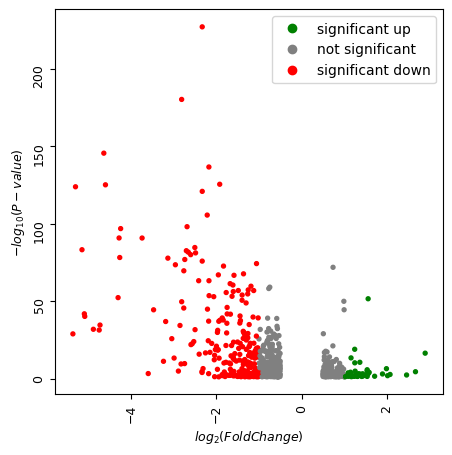

In [36]:
visuz.GeneExpression.volcano(df=sigs, lfc='log2FoldChange', pv='padj', show=True, plotlegend=True)

showing 10 most significant DEG in the plot

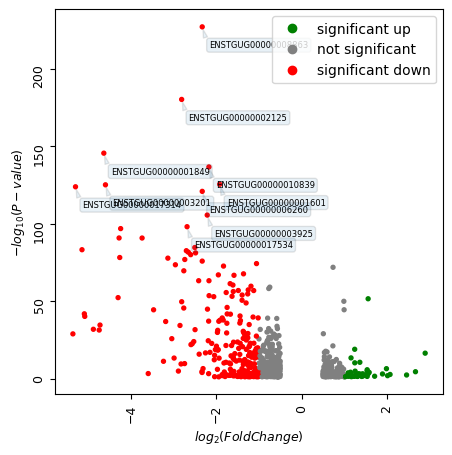

In [56]:
visuz.GeneExpression.volcano(df=sigs, lfc='log2FoldChange', pv='padj', show=True, plotlegend=True, geneid="geneID", genenames=most_sign, gstyle=2)

**RESULT:** The genes displayed in the above chart exhibit higher p-values, indicating their significance in the DEG analysis.